In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import random
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# matplotlib.use('svg')
import matplotlib.colors as mcolors
palet = list(mcolors.CSS4_COLORS.keys())
plt.style.use('seaborn')

In [ ]:
def is_bin(ser):
    if ser.unique().shape[0] == 2 and sum(np.sort(ser.unique()) == [0, 1]) == 2:
        return True
    return False

# 100 000 UK Used Car Data set

### При распаковке было обнаружено, что есть повторяющиеся файлы. В частности автором датасета был изначально составлен датасет для моделей Ford Focus и Mers. C Class. При этом для каждого был обработанный и неочищенный датасет. Они были удалены, так как присутствовали в дополнительных таблицах.

In [ ]:
path = r'C:\Users\Evgeniya\Documents\MSU20_21\PZAD\Viz\Machines.zip'
with ZipFile(path, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
# zipObj.namelist()
namelist = ['audi.csv', 'bmw.csv', 'ford.csv',
            'hyundi.csv', 'merc.csv', 'skoda.csv',
            'toyota.csv', 'vauxhall.csv', 'vw.csv']

total = pd.DataFrame([])
for file_name in namelist:
    df = pd.read_csv(file_name)
    df['brand'] = file_name.replace(".csv", "")
    total = pd.concat([total,df], axis=0).reset_index(drop=True)
    
total['Tax'] = total['tax'].fillna(0) + total['tax(£)'].fillna(0)
total['Tax'] = total['Tax'].astype(int)
total['l_100km'] = 235.26476 / total['mpg']
total = total.round({'l_100km':2})
del total['tax']
del total['tax(£)']

In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   mpg           99187 non-null  float64
 7   engineSize    99187 non-null  float64
 8   brand         99187 non-null  object 
 9   Tax           99187 non-null  int32  
 10  l_100km       99187 non-null  float64
dtypes: float64(3), int32(1), int64(3), object(4)
memory usage: 7.9+ MB


В переменной Year было обнаружено значение 2060, что видимо является опечаткой при заполнении данных, так как год - год регистрации.

In [ ]:
total[total.year == 2060]

model  year  price transmission  mileage fuelType   mpg  engineSize  \
39175   Fiesta  2060   6495    Automatic    54807   Petrol  42.8         1.4   

      brand  Tax  l_100km  
39175  ford  205      5.5

In [ ]:
total[total['model'] == ' Fiesta']

model  year  price transmission  mileage fuelType   mpg  engineSize  \
21449   Fiesta  2017  12000    Automatic    15944   Petrol  57.7         1.0   
21452   Fiesta  2019  17500       Manual    10460   Petrol  40.3         1.5   
21453   Fiesta  2019  16500    Automatic     1482   Petrol  48.7         1.0   
21454   Fiesta  2015  10500       Manual    35432   Petrol  47.9         1.6   
21456   Fiesta  2017   9000       Manual    13054   Petrol  54.3         1.2   
...        ...   ...    ...          ...      ...      ...   ...         ...   
39394   Fiesta  2019  15999       Manual     2813   Petrol  58.9         1.0   
39395   Fiesta  2015   8999       Manual    24546   Petrol  65.7         1.0   
39401   Fiesta  2017   9899    Automatic    16303   Petrol  57.7         1.0   
39404   Fiesta  2018  12500    Automatic     7047   Petrol  48.7         1.0   
39409   Fiesta  2016   7999       Manual    31348   Petrol  54.3         1.2   

      brand  Tax  l_100km  
21449  ford  150     4.08  
21452  ford  145     5.84  
21453  ford  145     4.83  
21454  ford  145     4.91  
21456  ford  145     4.33  
...     ...  ...      ...  
39394  ford  145     3.99  
39395  ford    0     3.58  
39401  ford    0     4.08  
39404  ford  145     4.83  
39409  ford  125     4.33  

[6557 rows x 11 columns]

Данных по авто такого типа достаточно, поэтому просто выбросим данное наблюдение.

In [ ]:
total.drop(39175, inplace=True)

In [ ]:
total[total.engineSize == 0]

model  year  price transmission  mileage fuelType    mpg  engineSize  \
7505        Q5  2019  44790    Automatic     5886   Petrol  117.7         0.0   
7506        Q3  2019  32788    Automatic     1500   Diesel   47.1         0.0   
7516        Q3  2020  29944       Manual     1500   Petrol   40.9         0.0   
7517        Q3  2020  33333    Automatic     1500   Diesel   47.1         0.0   
7518        Q3  2020  29944    Automatic     1500   Petrol   32.5         0.0   
...        ...   ...    ...          ...      ...      ...    ...         ...   
95678   Tiguan  2016  15300       Manual    38398   Diesel   53.3         0.0   
95685   Tiguan  2018  24000    Automatic    22200   Diesel   47.9         0.0   
96851       Up  2017   8500       Manual    20324   Petrol   64.2         0.0   
96909       Up  2017   8000       Manual    24444   Petrol   60.1         0.0   
97342   Beetle  2017  13800       Manual    17859   Petrol   53.3         0.0   

      brand  Tax  l_100km  
7505   audi  135     2.00  
7506   audi  145     5.00  
7516   audi  145     5.75  
7517   audi  145     5.00  
7518   audi  145     7.24  
...     ...  ...      ...  
95678    vw  145     4.41  
95685    vw  145     4.91  
96851    vw   20     3.66  
96909    vw   20     3.91  
97342    vw  125     4.41  

[273 rows x 11 columns]

Изобразим распределение категориальных переменных

In [ ]:
def cat_bar(data_arr, f_size, rotation, save, 
            f_s_t = 30, f_s_x = 15, f_s_y = 15, x_l_s = 15, y_l_s = 15, a_f_s = 20,
            w = 0, autol = False, sort_i=False, sh_e = None):
#     Для категориально переменной считаем уникальные значения, будем работать с ними
    data = data_arr.value_counts()
    data = data[data > w *  data_arr.shape[0]] 
    if sort_i:
        data.sort_index(inplace = True)
    unique_vals, unique_counts = data.index.astype(str), data.values
    
#     Непосредственно визуализация
    fig, ax = plt.subplots(facecolor = None, figsize = f_size)
#     if set_lim:
#         print('set lim')
#         ax.set_xlim(min_x, max_x)
#         start, end = ax.get_xlim()
#         ax.xaxis.set_ticks(np.arange(start, end, 1))
    ax.set_title('The distribution of variable - {}'.format(data.name), fontsize=f_s_t)
    ax.set_ylabel('Frequency', fontsize=f_s_y)
    ax.set_xlabel('{}'.format(data.name), fontsize = f_s_x)
#     ax.set_ylim(0, 70000)
    ax.grid(True)
    rects = ax.bar(unique_vals, unique_counts, color='blueviolet')
    
    if autol:
        i=0
        for rect in rects:
            if sh_e != None:
                i+=1
                if i%sh_e != 0:
                    continue                
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x(), height),
                        xytext=(20, 0),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                       fontsize = a_f_s, fontstyle = 'italic',
                       color ='midnightblue')
            
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=rotation, fontsize = x_l_s,
             color ='midnightblue', horizontalalignment='center', fontstyle = 'italic')
    labels = ax.get_yticklabels() # 'oblique'}

    plt.setp(labels,fontsize = y_l_s, color ='midnightblue',  horizontalalignment='right')
    fig.patch.set_alpha(0)
    #     Если требуется сохранить полученную картинку
    if save:
        print(f'{data.name}.png saved successfully')
        plt.savefig(f'{data.name}.png')

In [ ]:
cat_v = ['model', 'year', 'transmission', 'fuelType', 'engineSize','brand','Tax']

model.png saved successfully


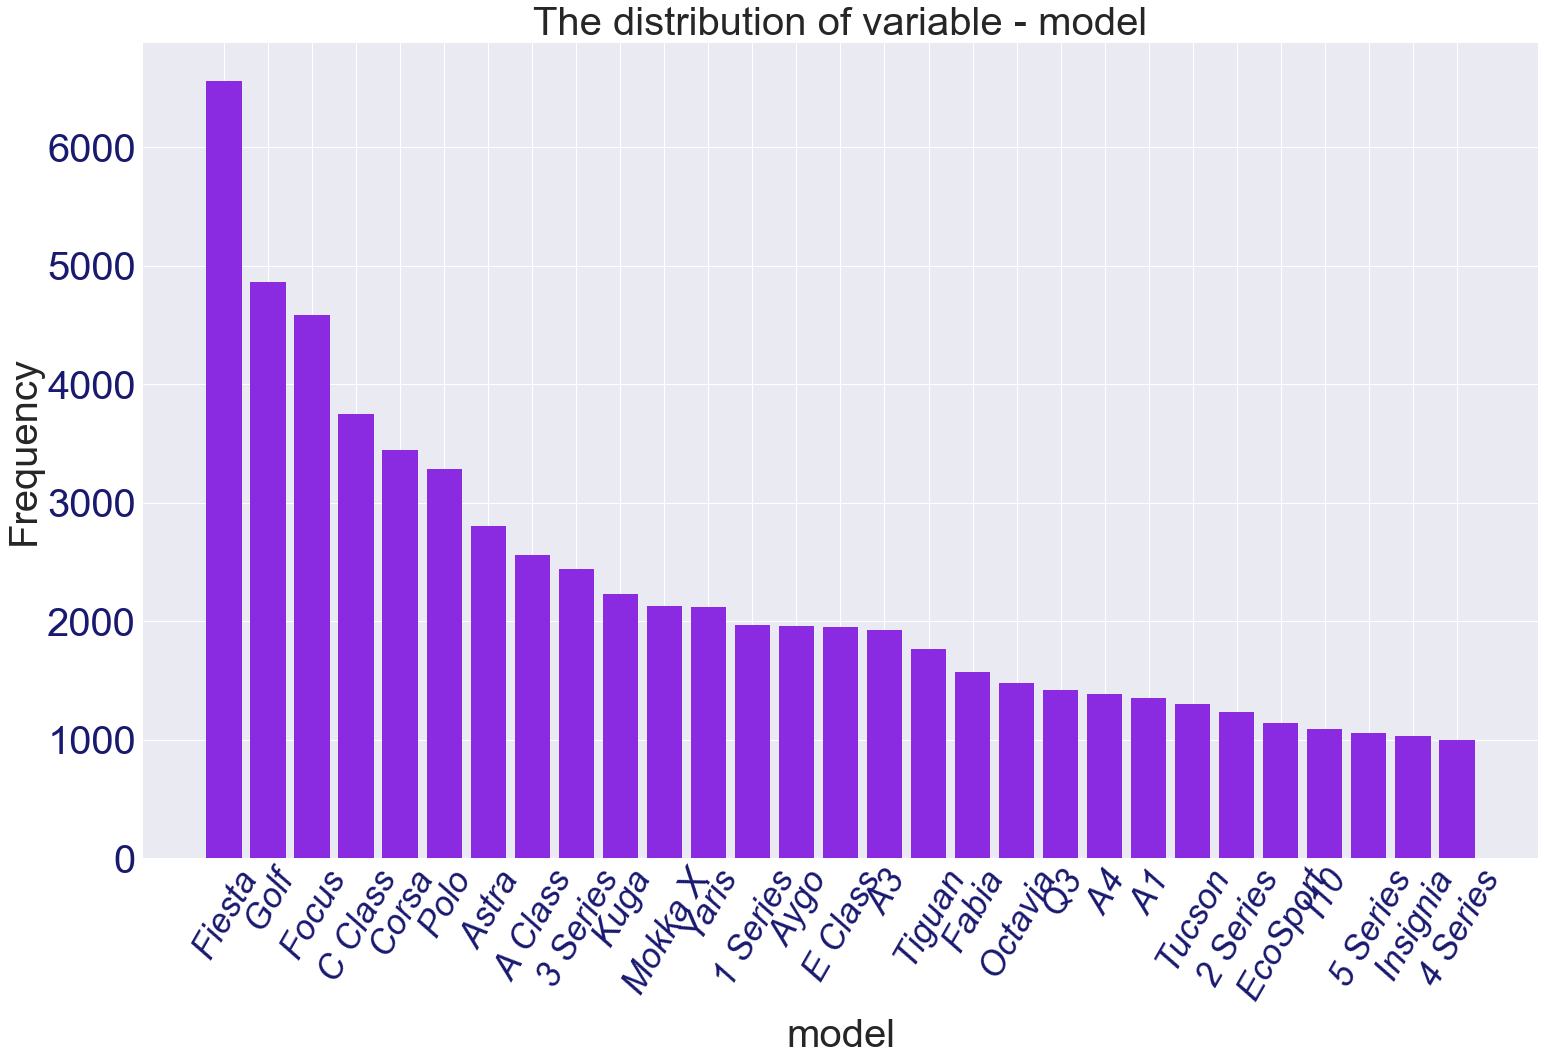

In [ ]:
cat_bar(total[cat_v[0]], (25, 15), 60, True, w = 0.01,
        f_s_x = 40, f_s_y = 40, x_l_s = 35, y_l_s = 40, f_s_t = 40,
       autol =False)

year.png saved successfully


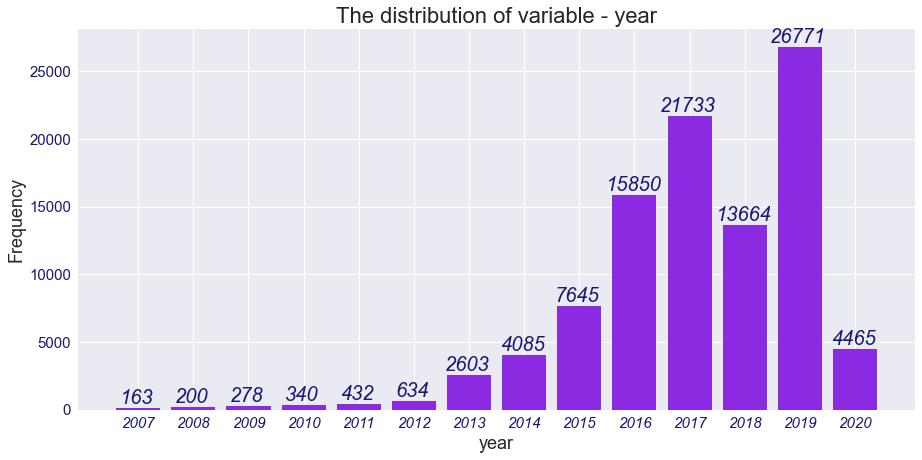

In [ ]:
cat_bar(total[cat_v[1]], (15, 7), 0, True, 
        f_s_x = 18, f_s_y = 18, autol = True, f_s_t = 22, w = 0.001, sort_i = True)

transmission.png saved successfully


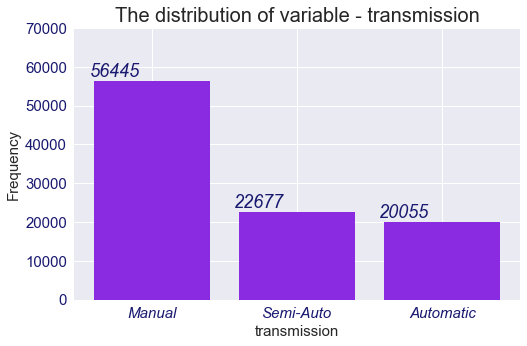

In [ ]:
cat_bar(total[cat_v[2]], (8, 5), 0, True, 
            f_s_t = 20, w = 0.0001, autol =True, a_f_s = 18)

fuelType.png saved successfully


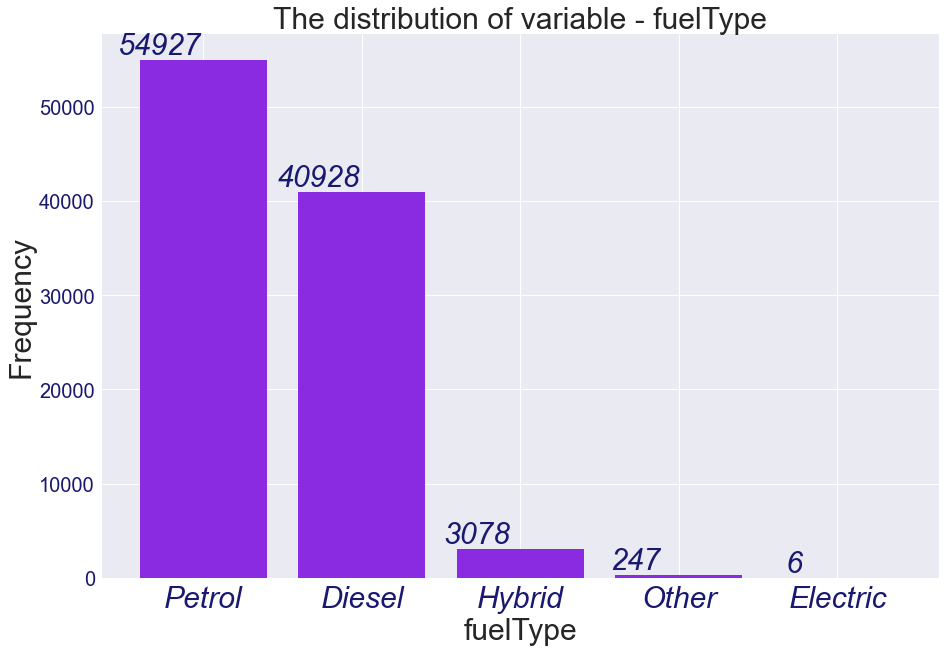

In [ ]:
cat_bar(total[cat_v[3]], (15, 10), 0, True, 
            f_s_t = 30, f_s_x = 30, f_s_y = 30, x_l_s = 30, y_l_s = 20,
            w = 0, a_f_s = 30, autol = True)

brand.png saved successfully


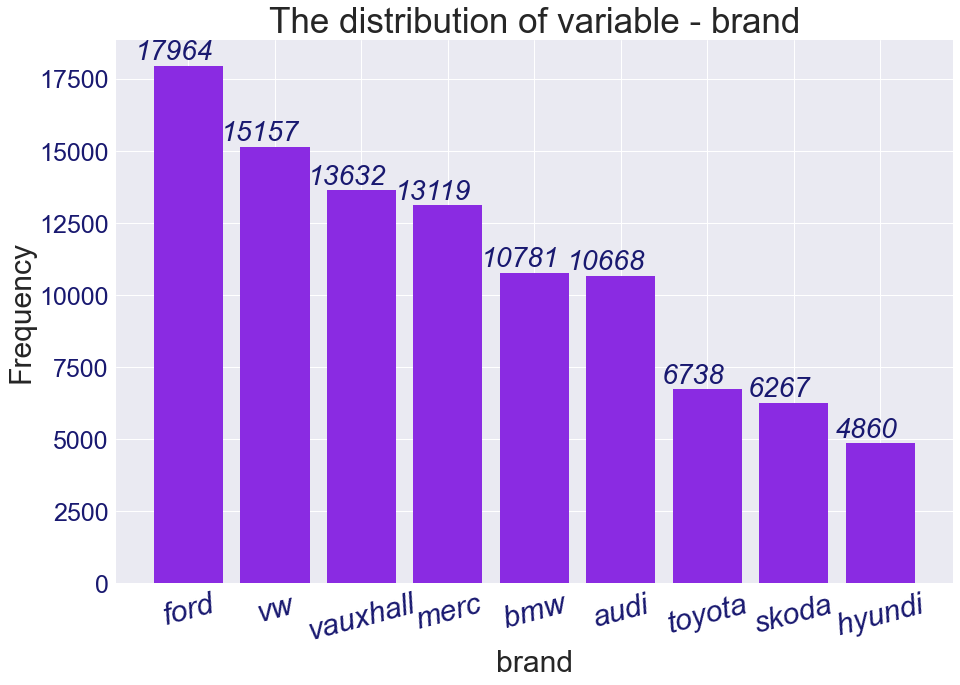

In [ ]:
cat_bar(total[cat_v[5]], (15, 10), 15, True, 
            f_s_t = 35, f_s_x = 30, f_s_y = 30, x_l_s = 30, y_l_s = 25,
            w = 0, a_f_s = 28, autol = True)

Tax.png saved successfully


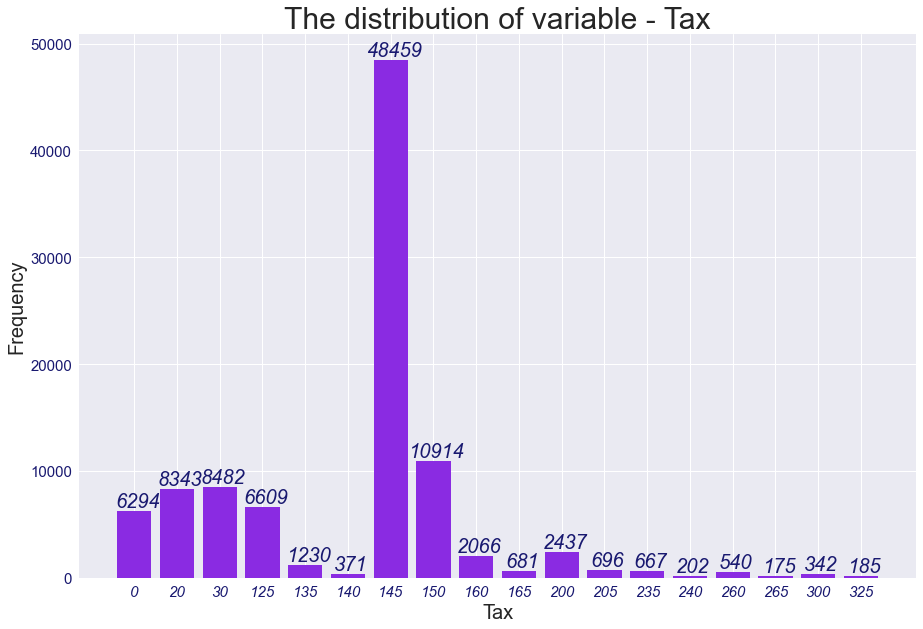

In [ ]:
cat_bar(total[cat_v[6]], (15, 10), 0, True, 
            f_s_t = 30, f_s_x = 20, f_s_y = 20, x_l_s = 15, y_l_s = 15,
            w = 0.001, autol = True, sort_i = True, a_f_s = 20)

engineSize.png saved successfully


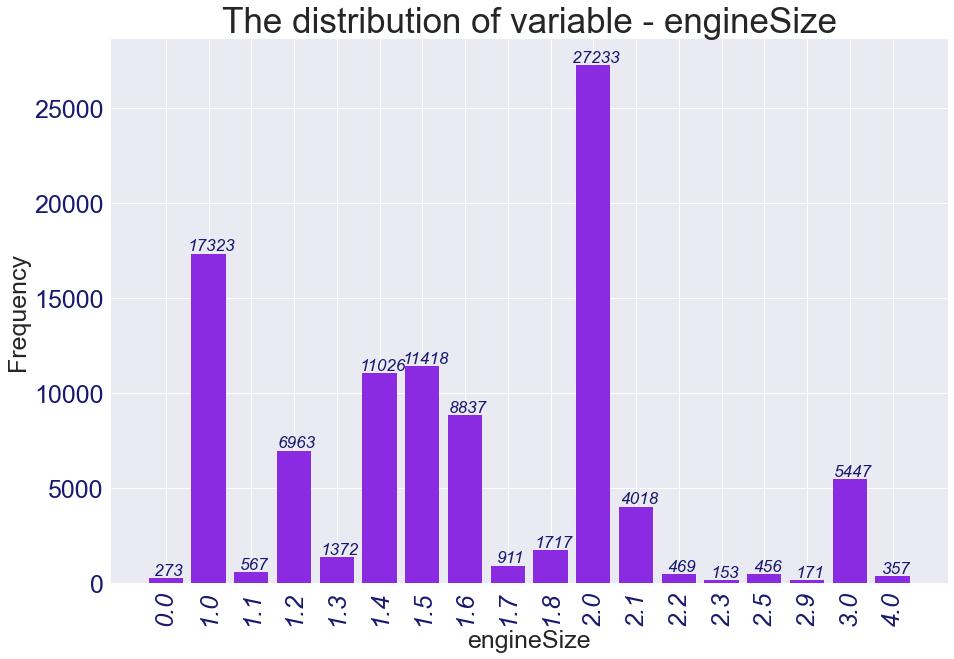

In [ ]:
cat_bar(total[cat_v[4]], (15, 10), 90, True, 
            f_s_t = 35, f_s_x = 25, f_s_y = 25, x_l_s = 25, y_l_s = 25, a_f_s = 17,
            w = 0.001, autol = True, sort_i=True)

In [ ]:
def q_hist(data, f_size, bins, rotation, save,l = 'Total', alpha=0.5,
          f_s_t = 30, f_s_x = 20, f_s_y = 20, color='darkslategray',
          x_l_s = 15, y_l_s = 15, log=False, *args):
    fig, ax = plt.subplots(figsize = f_size)
    ax.set_title('The distribution of variable - {}'.format(data.name), fontsize=f_s_t)
    ax.set_ylabel('Frequency', fontsize=f_s_y)
    if log:
        ax.set_xlabel('Log({})'.format(data.name), fontsize = f_s_x)
    else:
        ax.set_xlabel('{}'.format(data.name), fontsize = f_s_x)
    ax.grid(True)
    ax.hist(data, histtype = 'stepfilled', bins=bins, color = 'c', alpha=alpha, label=f'{l}')
    ax.legend(fontsize=30)
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=rotation, fontsize = x_l_s,
             color =color, horizontalalignment='center', fontstyle = 'italic')# 'oblique'
    labels = ax.get_yticklabels() 
    fig.patch.set_alpha(0)
    plt.setp(labels,fontsize = y_l_s, color =color,  horizontalalignment='right')
    
    if save:
        print(f'{data.name}{l}{log}.svg saved successfully')
        fig.savefig(f'{data.name}{l}{log}.svg', format="svg")

In [ ]:
q_val = ['price','mileage', 'kml']

priceTotalFalse.svg saved successfully


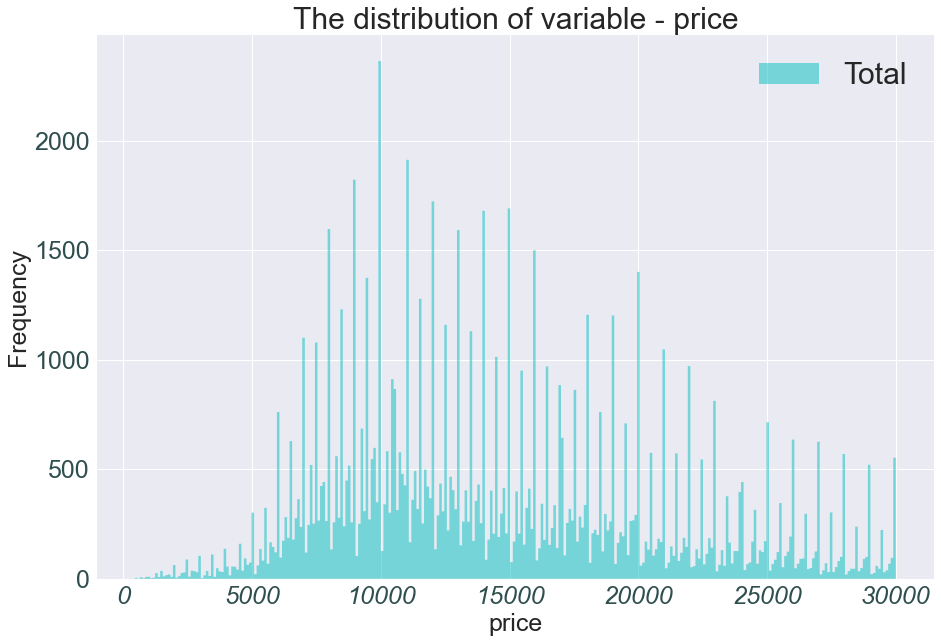

In [ ]:
d = total[q_val[0]]
q_hist(d[d<30000], (15,10), 300, 0, True, l = 'Total', alpha=0.5,
          f_s_t = 30, f_s_x = 25, f_s_y = 25, color='darkslategray',
          x_l_s = 25, y_l_s = 25, log=False )

In [ ]:
total.price.value_counts()[:20]

9995     594
8995     494
10995    483
12995    447
7995     433
11995    431
14995    427
11000    409
13995    396
10000    394
12000    380
19995    343
15995    333
10500    330
9999     328
9990     327
9495     327
10990    326
6995     323
9000     314
Name: price, dtype: int64

priceends with 0False.svg saved successfully


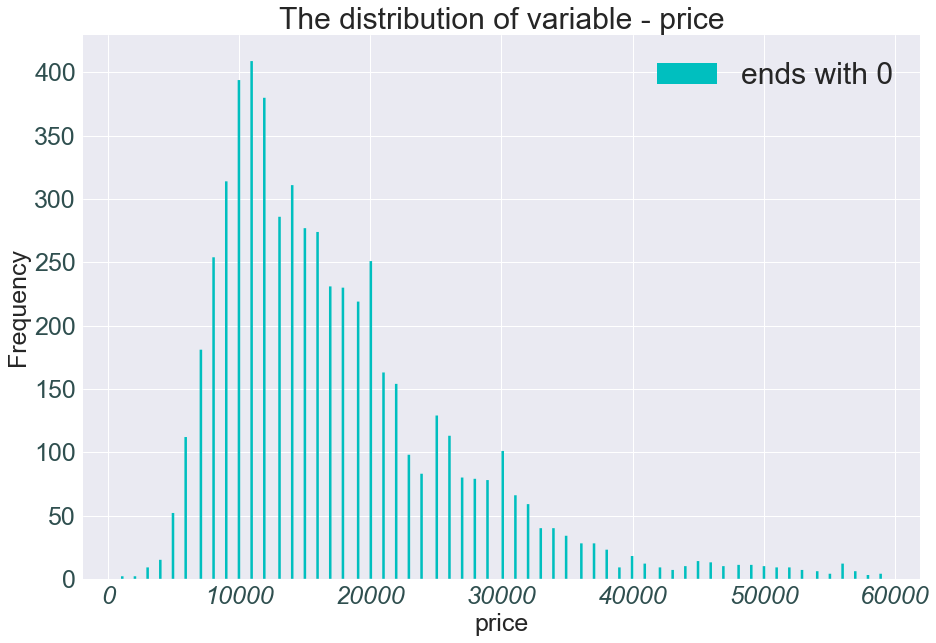

In [ ]:
d_1 = d[d<60000]
q_hist(d_1[d_1%1000 == 0], (15,10), 300, 0, True, alpha=1,
       f_s_t = 30, f_s_x = 25, f_s_y = 25, 
       x_l_s = 25, y_l_s = 25,
       color='darkslategray', l = 'ends with 0', log=False)

In [ ]:
total[total.price%1000 == 995]

model  year  price transmission  mileage fuelType   mpg  \
179             A4  2015  15995       Manual    38787   Diesel  55.4   
222             Q7  2019  59995    Automatic       10   Diesel  33.2   
243             A3  2019  21995       Manual       10   Diesel  54.3   
250             A3  2014  14995    Semi-Auto    27355   Petrol  42.8   
253             A3  2016  12995       Manual    25895   Diesel  70.6   
...            ...   ...    ...          ...      ...      ...   ...   
99171        Caddy  2016  12995       Manual    20688   Diesel  60.1   
99172   Caddy Maxi  2015   9995    Semi-Auto    66000   Diesel  48.7   
99173   Caddy Maxi  2012   9995    Semi-Auto    53000   Diesel  48.7   
99177          Eos  2008   4995       Manual    65000   Diesel  48.0   
99181          Eos  2006   2995       Manual    92640   Diesel  48.0   

       engineSize brand  Tax        kml  
179           2.0  audi  145  23.554422  
222           3.0  audi  145  14.115646  
243           1.6  audi  145  23.086735  
250           1.8  audi  160  18.197279  
253           2.0  audi   20  30.017007  
...           ...   ...  ...        ...  
99171         2.0    vw  125  25.552721  
99172         1.6    vw  200  20.705782  
99173         1.6    vw  200  20.705782  
99177         2.0    vw  195  20.408163  
99181         2.0    vw  200  20.408163  

[8361 rows x 11 columns]

priceends with 990True.svg saved successfully


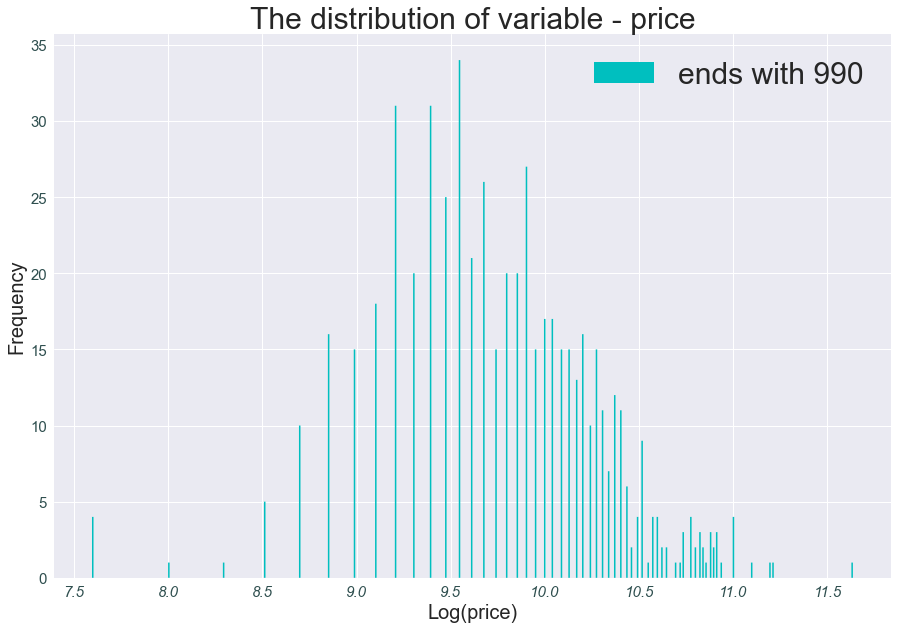

In [ ]:
q_hist(np.log(total[total.price%1000 == 990].price), (15,10), 500, 0, True, alpha=1,
          f_s_t = 30, f_s_x = 20, f_s_y = 20, color='darkslategray', l = 'ends with 990',
          x_l_s = 15, y_l_s = 15, log=True)

In [ ]:
total[total.price%1000 == 990]

model  year  price transmission  mileage fuelType   mpg  \
317             A4  2019  25990    Semi-Auto     5987   Petrol  38.2   
333             Q5  2015  22990    Semi-Auto    60599   Diesel  42.8   
344             A4  2019  27990    Semi-Auto       26   Diesel  47.9   
381             A4  2019  25990       Manual     4598   Petrol  38.2   
396             A3  2015  14990    Semi-Auto    30530   Diesel  64.2   
...            ...   ...    ...          ...      ...      ...   ...   
99042        Jetta  2016  10990       Manual    30886   Diesel  67.3   
99065           CC  2016  12990    Semi-Auto    52276   Diesel  58.9   
99103           CC  2013   7990       Manual    74000   Diesel  60.1   
99162   Caddy Life  2017  14990       Manual    15986   Diesel  60.1   
99182          Eos  2012   5990       Manual    74000   Diesel  58.9   

       engineSize brand  Tax        kml  
317           2.0  audi  145  16.241497  
333           3.0  audi  240  18.197279  
344           2.0  audi  145  20.365646  
381           2.0  audi  145  16.241497  
396           2.0  audi   30  27.295918  
...           ...   ...  ...        ...  
99042         2.0    vw   20  28.613946  
99065         2.0    vw  125  25.042517  
99103         2.0    vw   30  25.552721  
99162         2.0    vw  145  25.552721  
99182         2.0    vw  125  25.042517  

[6133 rows x 11 columns]

priceends with 999False.svg saved successfully


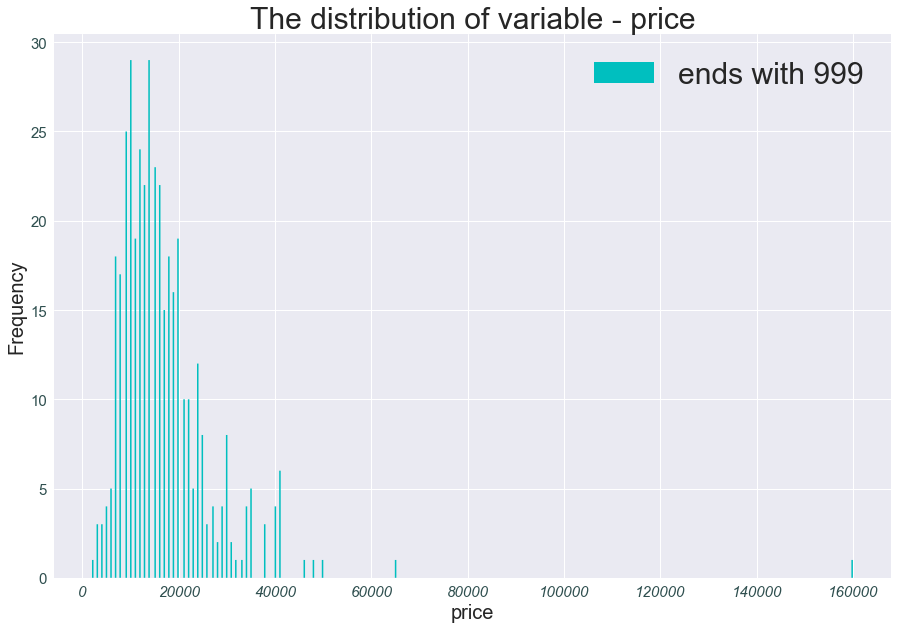

In [ ]:
q_hist(total[total.price%1000 == 999].price, (15,10), 500, 0, True, alpha=1,
          f_s_t = 30, f_s_x = 20, f_s_y = 20, color='darkslategray', l = 'ends with 999',
          x_l_s = 15, y_l_s = 15, log=False)

In [ ]:
total[total.price%1000 == 999]

model  year  price transmission  mileage fuelType   mpg  \
1132            A4  2019  25999    Automatic     5432   Diesel  50.4   
1371            A3  2018  20999    Automatic     3954   Petrol  56.5   
1565            Q2  2019  20999       Manual     5000   Petrol  47.1   
1566            Q5  2019  46999    Semi-Auto     5000   Diesel  36.2   
1568            A3  2016  13999    Semi-Auto    28307   Diesel  72.4   
...            ...   ...    ...          ...      ...      ...   ...   
99108           CC  2014   9999    Automatic    61063   Diesel  53.3   
99143   California  2019  55999    Automatic     8783   Diesel  32.1   
99148   California  2018  54999    Automatic     7865   Diesel  44.1   
99150   California  2019  54999    Automatic    10501   Diesel  32.1   
99168        Caddy  2016  11999    Automatic    59523   Diesel  55.4   

       engineSize brand  Tax        kml  
1132          2.0  audi  145  21.428571  
1371          1.5  audi  145  24.022109  
1565          1.0  audi  145  20.025510  
1566          2.0  audi  145  15.391156  
1568          1.6  audi   20  30.782313  
...           ...   ...  ...        ...  
99108         2.0    vw  145  22.661565  
99143         2.0    vw  260  13.647959  
99148         2.0    vw  260  18.750000  
99150         2.0    vw  265  13.647959  
99168         2.0    vw  145  23.554422  

[4007 rows x 11 columns]

priceends with 999True.svg saved successfully


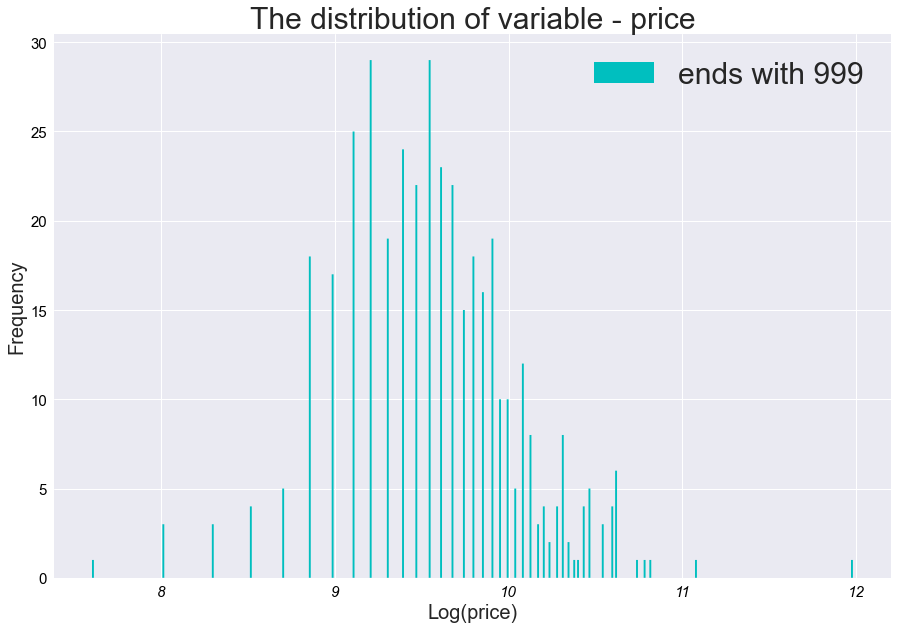

In [ ]:
q_hist(np.log(total[total.price%1000 == 999].price), (15,10), 400, 0, True, alpha=1,
          f_s_t = 30, f_s_x = 20, f_s_y = 20, color='black', l = 'ends with 999',
          x_l_s = 15, y_l_s = 15, log=True)

Выше была показана причина наличия пропастей в распределении цен, взлеты происходят вокруг наиболее популярных "окончаний" цен: 995, 990, 000, 999. Кроме того в окресностях "круглых" цен видим также скопления. (10000, 15000, 20000 и пр.)

mileagetotal15000_300False.svg saved successfully


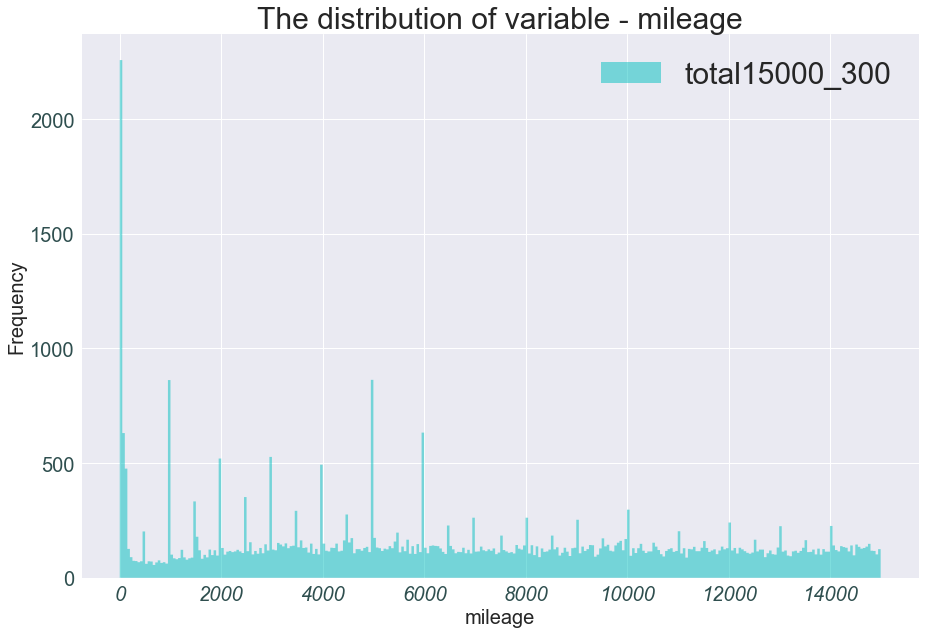

In [ ]:
q_hist(total[total[q_val[1]]<15000].mileage, (15,10), 300, 0,True, alpha=0.5,
          f_s_t = 30, f_s_x = 20, f_s_y = 20, color='darkslategray', l='total15000_300',
          x_l_s = 20, y_l_s = 20, log=False)

In [ ]:
total[total.mpg == 0.3]

model  year  price transmission  mileage fuelType  mpg  engineSize  \
98534   Golf SV  2019  17950       Manual      100   Petrol  0.3         1.0   

      brand  Tax  l_100km  
98534    vw  145   784.22

Выше показано распределение пробега до 40000 миль и видно, что люди любят округлять или ставить примерные значения, они попадают вновь на "круглые" числа.

Ниже представлен анализ показателя расхода топлива.

In [ ]:
total[total.mpg>=100].shape

(574, 11)

mpgless_than_100mpgFalse.svg saved successfully


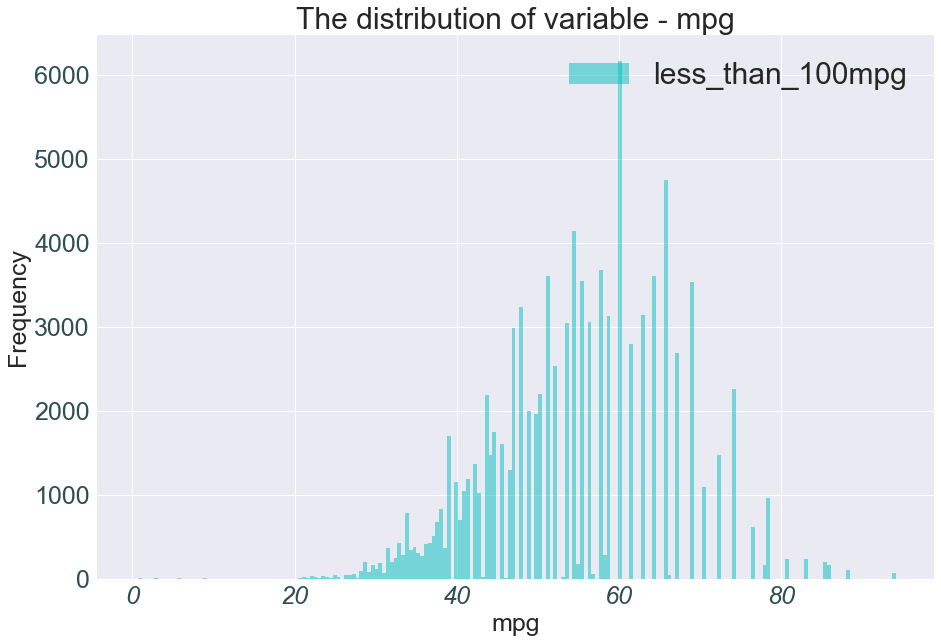

In [ ]:
q_hist(total[total.mpg<=100]['mpg'], (15,10), 200, 0,True, alpha=0.5,
          f_s_t = 30, f_s_x = 25, f_s_y = 25, color='darkslategray', l='less_than_100mpg',
          x_l_s = 25, y_l_s = 25, log=False)

l_100kmless_than_20lFalse.svg saved successfully


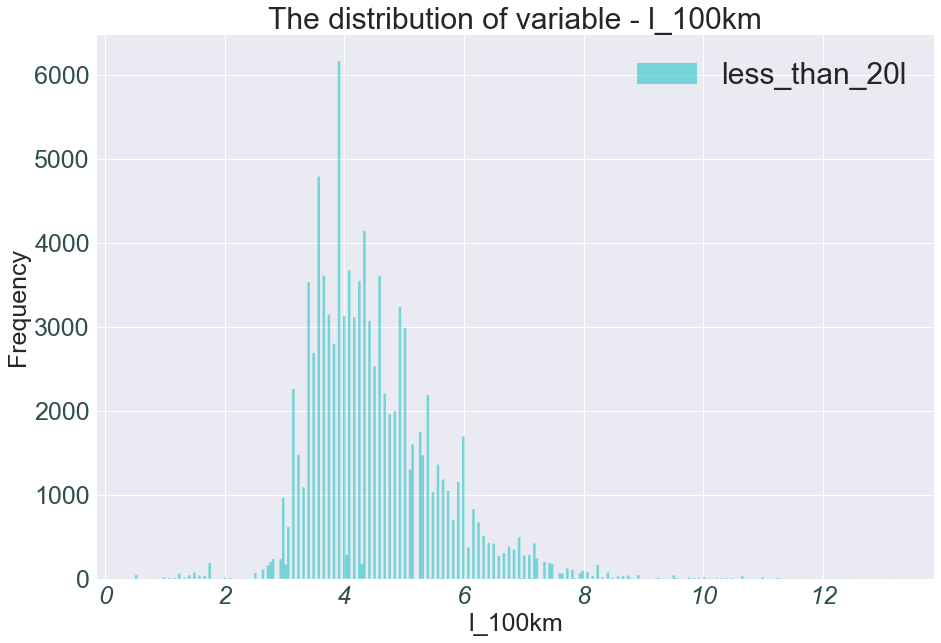

In [ ]:
q_hist(total[total.l_100km<=20]['l_100km'], (15,10), 300, 0,True, alpha=0.5,
          f_s_t = 30, f_s_x = 25, f_s_y = 25, color='darkslategray', l='less_than_20l',
          x_l_s = 25, y_l_s = 25, log=False)

### По словам автора данных, они были собраны для анализа ценообразования стоимости авто в зависимости от разных параметров. Поэтому следующим шагом анализируем как коррелирует стоимость с разными параметрами.

In [ ]:
def scatter(data, q_col, cat_col, 
           figsize =(15,10), alpha=0.5, f_s_t = 25,f_s_x=20,  f_s_y = 20, x_l_s = 15, y_l_s=15,
           rotation = 0, color = 'indigo', save=False, yscale=None):
    data = data[['price', q_col, cat_col]].sort_values(q_col)
    plt.style.use('seaborn')
    fig,  ax = plt.subplots(figsize=figsize)
    g = sns.scatterplot(x=q_col, y="price", 
                      hue=cat_col,palette = 'tab10',
                      data=data, alpha = alpha, ax = ax)
    plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
    plt.setp(ax.get_legend().get_title(), fontsize='20')
    if yscale!=None:
        g.set(yscale=yscale)
    ax.grid(True)
    ax.set_title(f'Scatter plot for variables price and {q_col}', fontsize=f_s_t)
    ax.set_ylabel('Price', fontsize=f_s_y)
    if data[cat_col].unique().shape[0] == 1:
        ax.set_xlabel('{} - {}'.format(q_col, data[cat_col].unique()), fontsize=f_s_x)
    else:
        ax.set_xlabel(q_col, fontsize=f_s_x)
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=rotation, fontsize = x_l_s,
             color =color, horizontalalignment='center', fontstyle = 'italic')# 'oblique'
    labels = ax.get_yticklabels()
    fig.patch.set_alpha(0)
    plt.setp(labels,fontsize = y_l_s, color =color,  horizontalalignment='right')
    if save:
        print(f'Scatter_price_{q_col}_{cat_col}.svg saved successfully')
        fig.savefig(f'Scatter_price_{q_col}_{cat_col}_{yscale}.svg')
    plt.show()

In [ ]:
np.random.seed(1)
ind = np.random.choice(99186, size=10000, replace=False)
ind.sort()
total = total.loc[ind]

Scatter_price_Tax_transmission.svg saved successfully


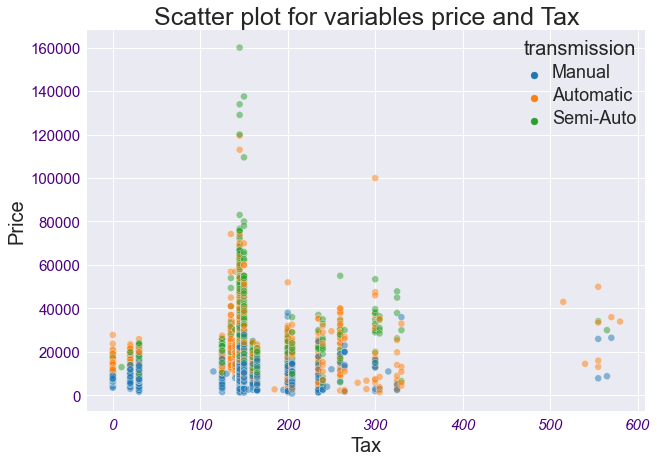

In [ ]:
scatter(total, 'Tax', 'transmission', figsize=(10,7), save=True)

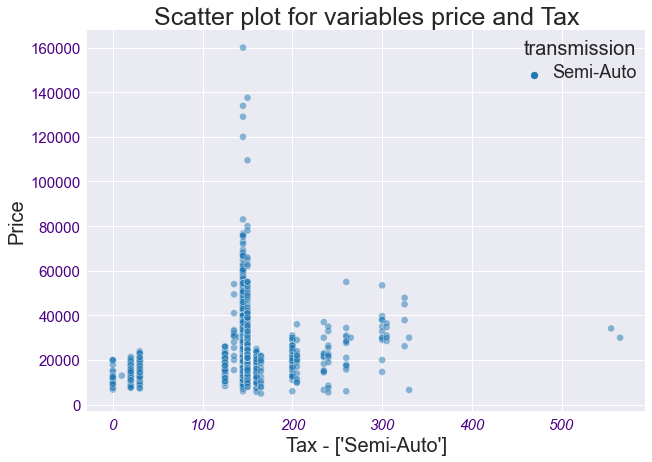

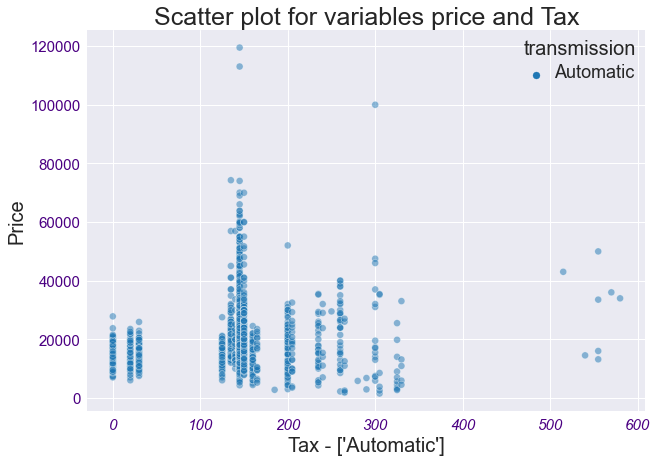

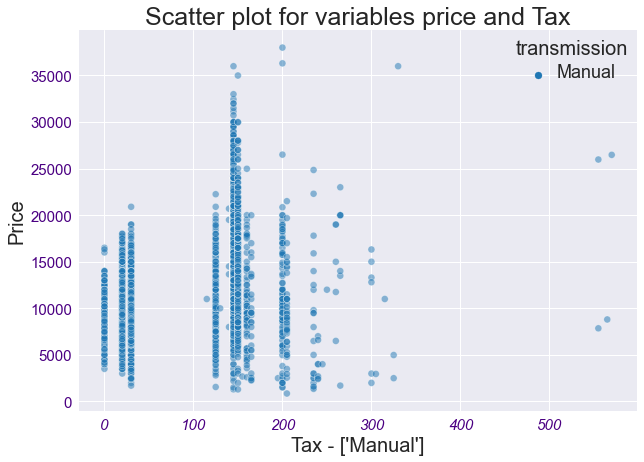

In [ ]:
for uniq in total.transmission.unique():
    scatter(total[total.transmission == uniq], 'Tax', 'transmission', figsize=(10,7))

Scatter_price_year_transmission.svg saved successfully


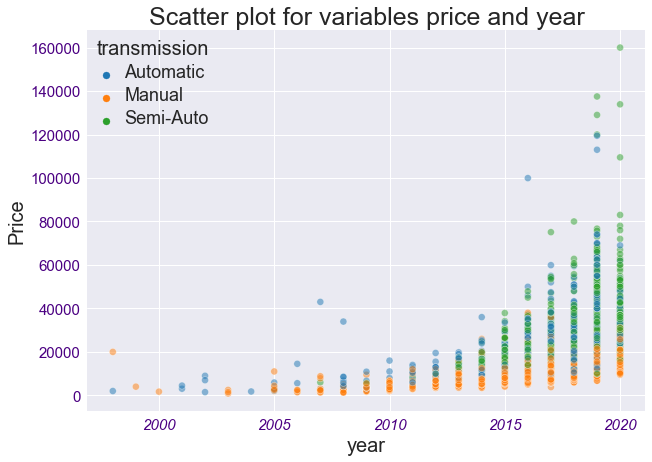

In [ ]:
scatter(total, 'year', 'transmission', figsize=(10,7), save=True)

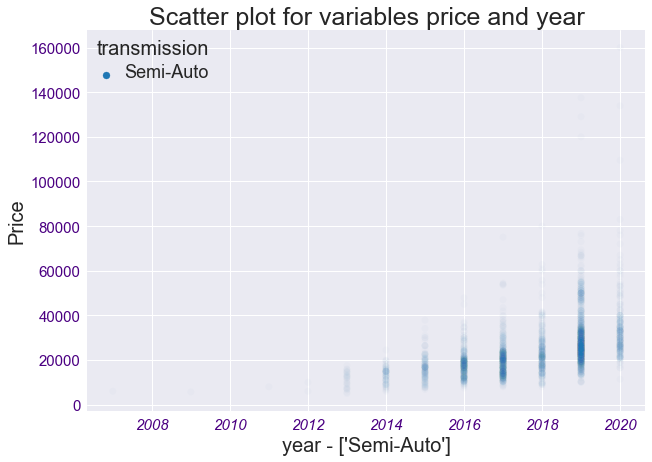

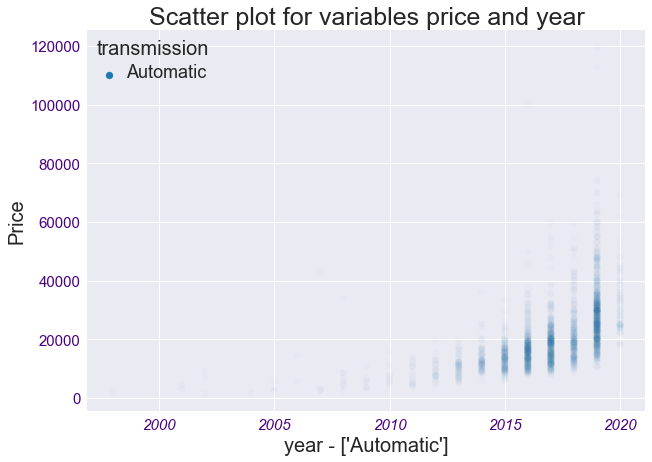

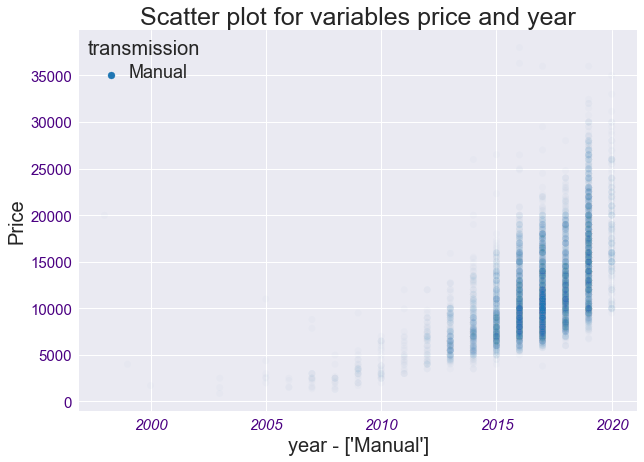

In [ ]:
for uniq in total.transmission.unique():
    scatter(total[total.transmission == uniq], 'year', 'transmission', figsize=(10,7), alpha = 0.02)

Scatter_price_engineSize_transmission.svg saved successfully


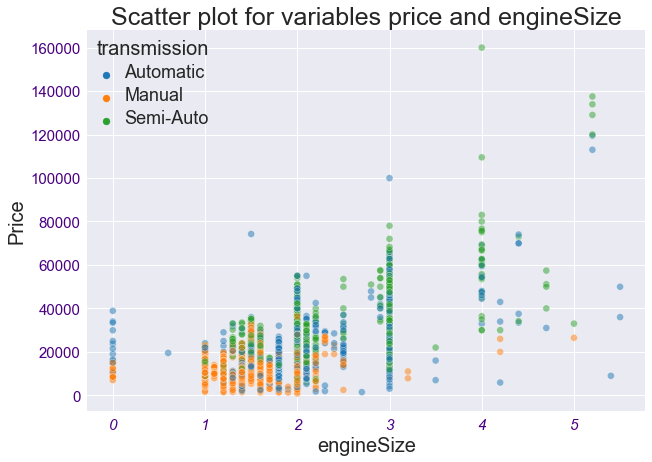

In [ ]:
scatter(total, 'engineSize', 'transmission', figsize=(10,7), save=True)

Scatter_price_mileage_transmission.svg saved successfully


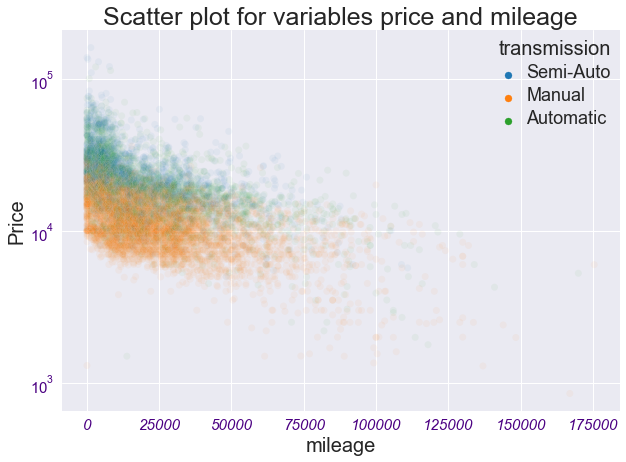

In [ ]:
scatter(total[total.mileage <=200000], 'mileage', 'transmission', figsize=(10,7), save=True, alpha=0.05, yscale='log')

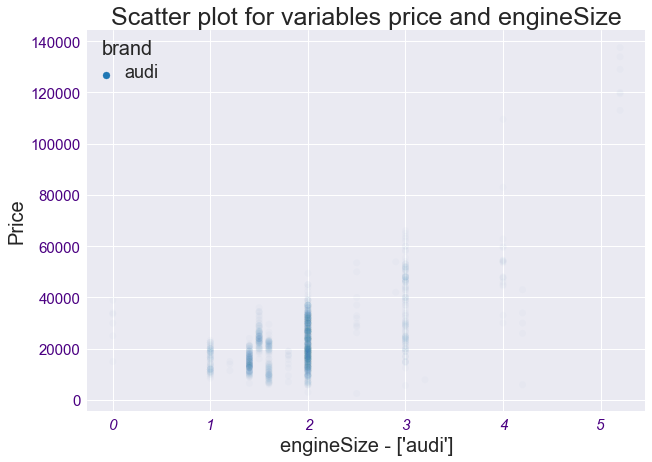

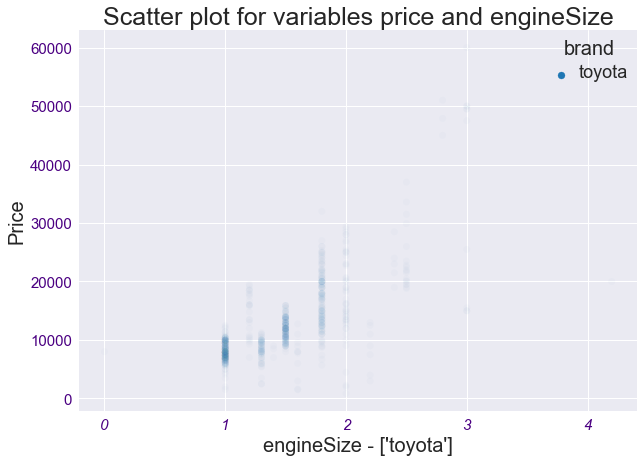

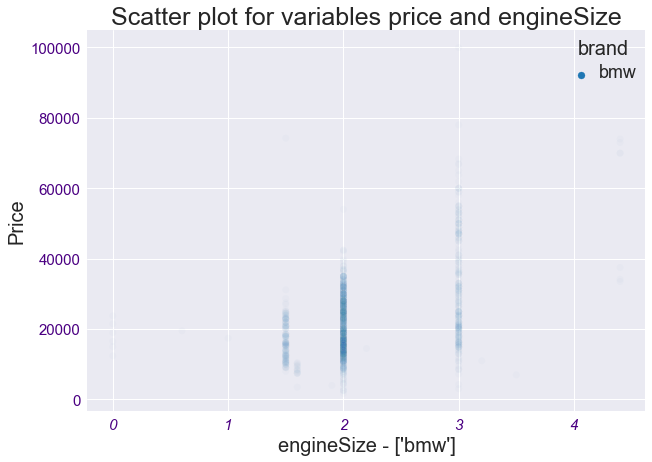

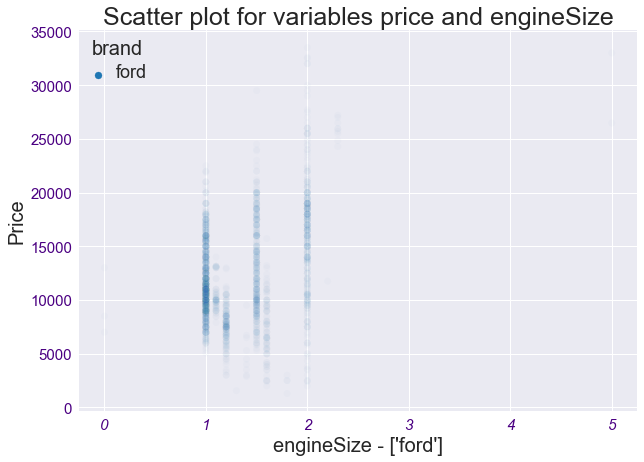

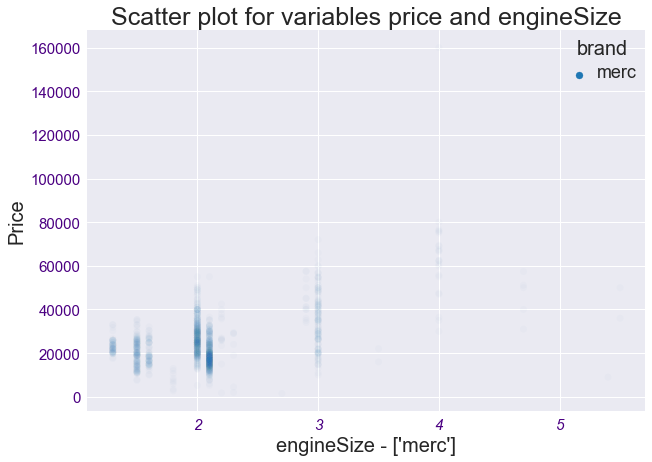

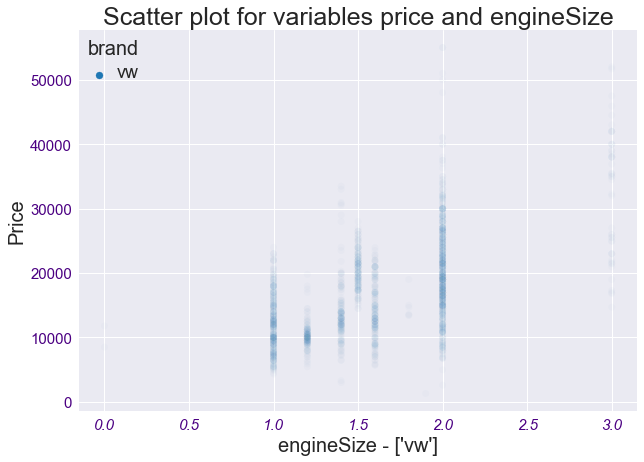

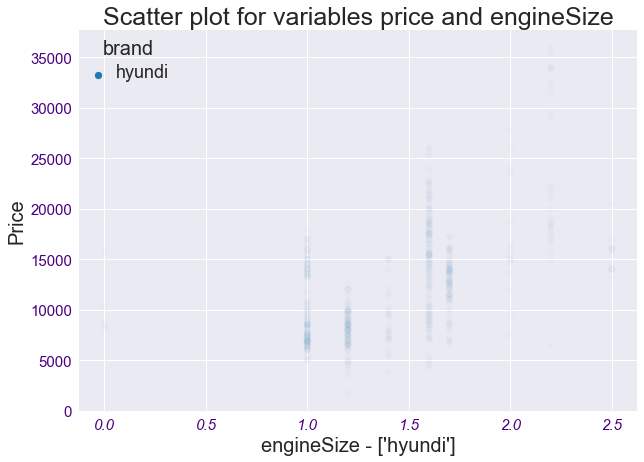

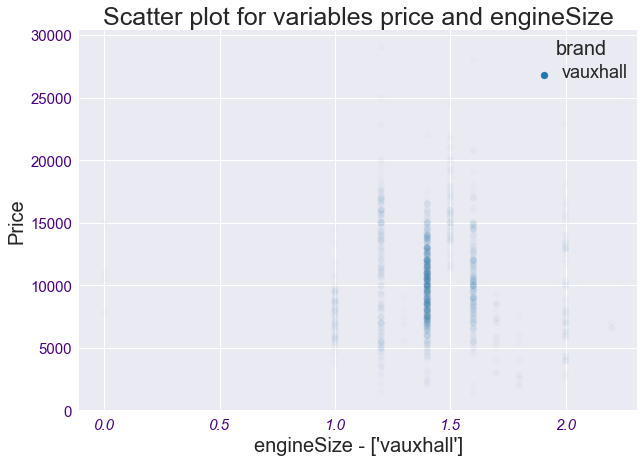

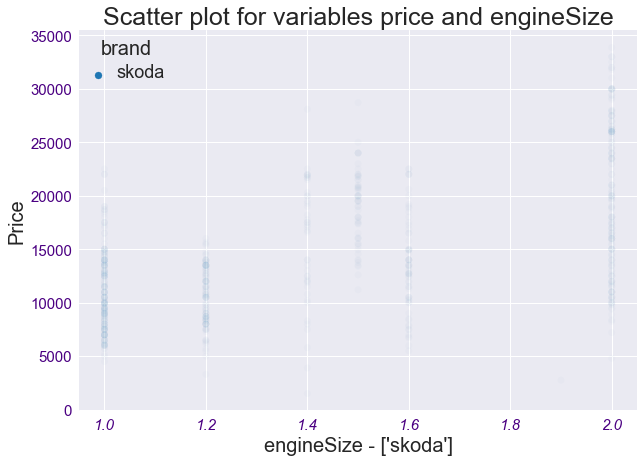

In [ ]:
for uniq in total.brand.unique():
    scatter(total[total.brand == uniq], 'engineSize', 'brand', figsize=(10,7), alpha=0.02)

Scatter_price_l_100km_fuelType.svg saved successfully


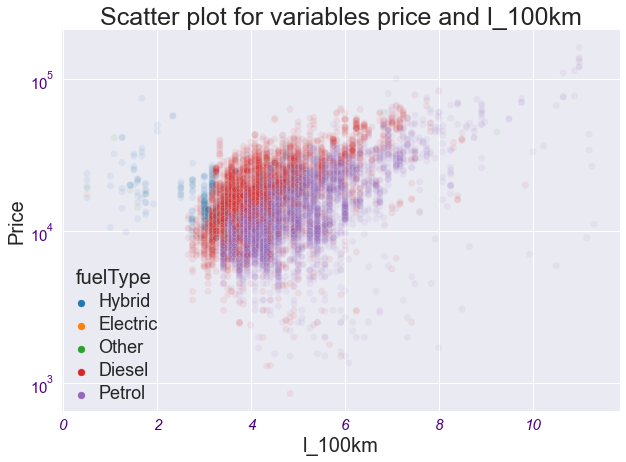

In [ ]:
scatter(total[total.l_100km <=20], 'l_100km', 'fuelType', figsize=(10,7), save=True, alpha = 0.08, yscale='log')

Diesel


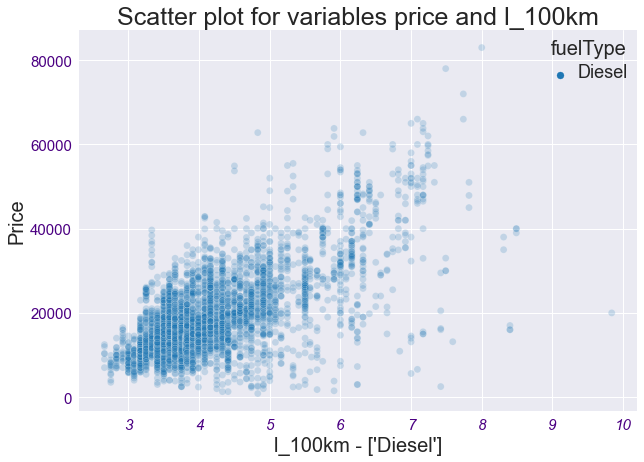

Petrol


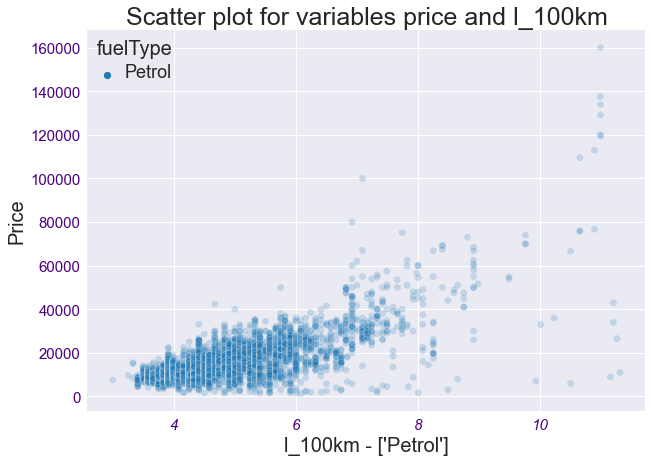

Hybrid


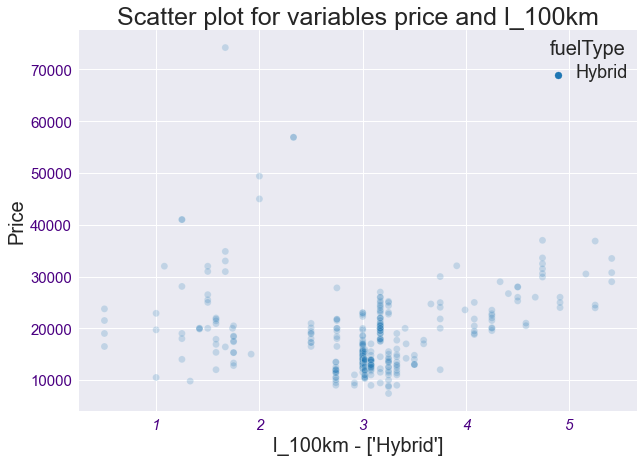

Other


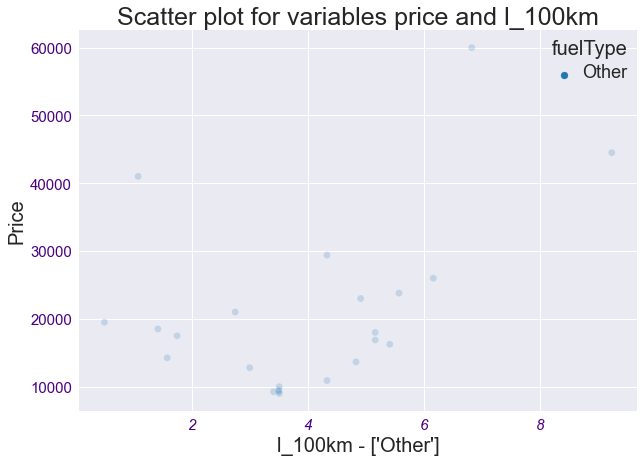

Electric


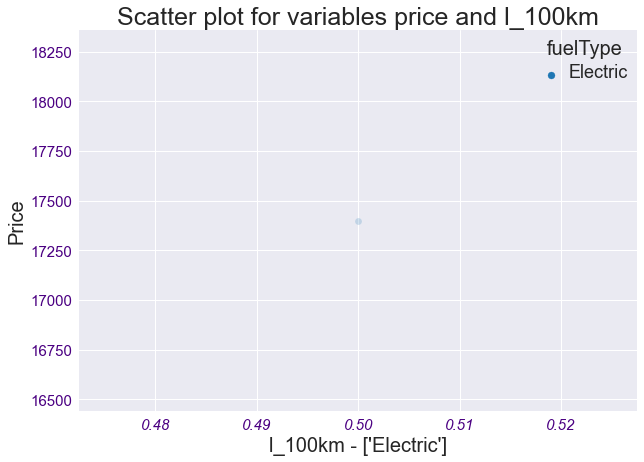

In [ ]:
d = total[total.l_100km <=20]
for uniq in d.fuelType.unique():
    print(uniq)
    scatter(d[d.fuelType == uniq], 'l_100km', 'fuelType', figsize=(10,7), alpha=0.2)

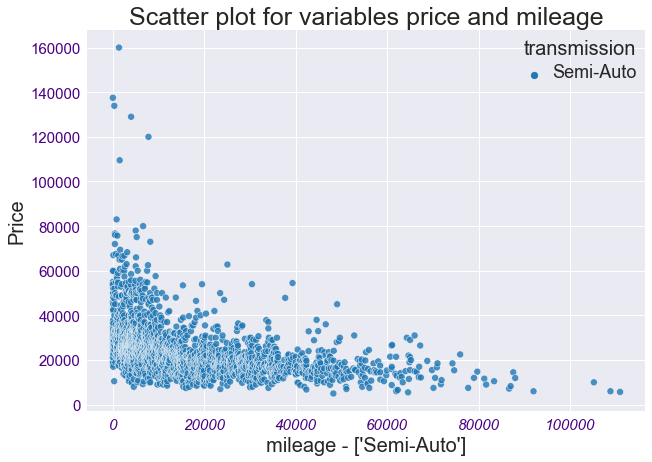

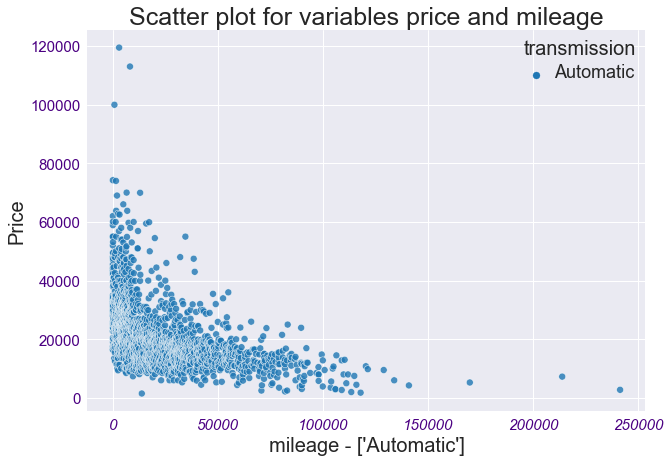

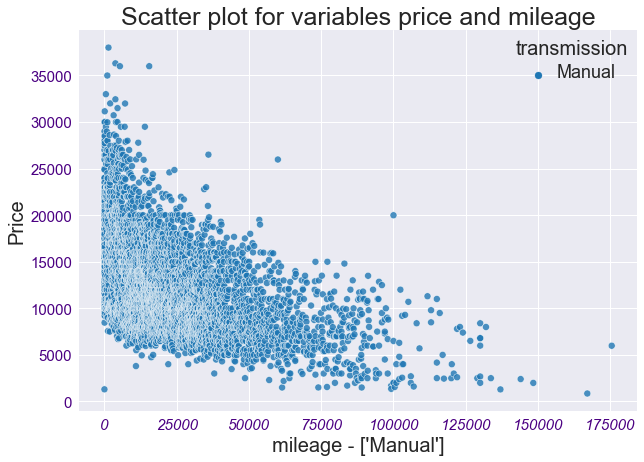

In [ ]:
for uniq in total.transmission.unique():
    scatter(total[total.transmission == uniq], 'mileage', 'transmission', figsize=(10,7), alpha=0.8)

In [ ]:
def full(data, q_var,cat_var, alpha, yscale=None):
    scatter(data, q_var, cat_var, figsize=(10,7), save=True, alpha = 0.08, yscale=yscale)
    for uniq in data[cat_var].unique():
        scatter(data[data[cat_var] == uniq], q_var, cat_var, figsize=(10,7), alpha=0.8)

Scatter_price_year_fuelType.svg saved successfully


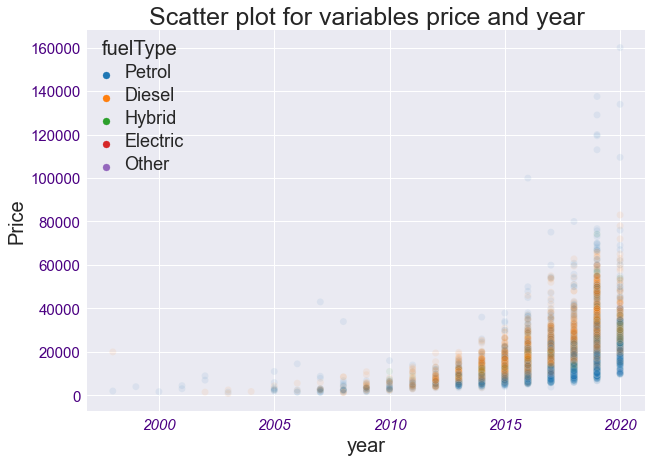

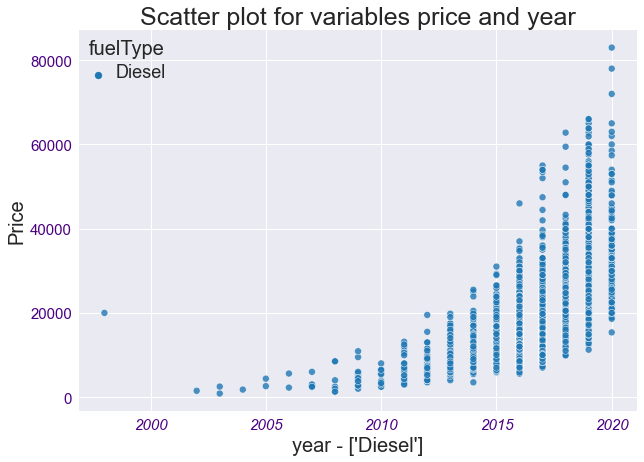

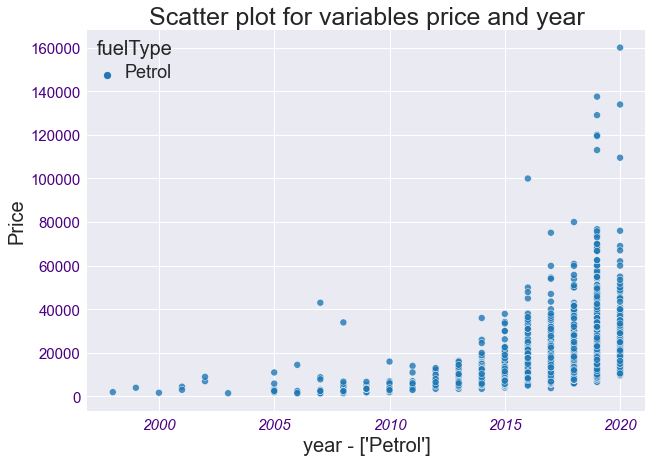

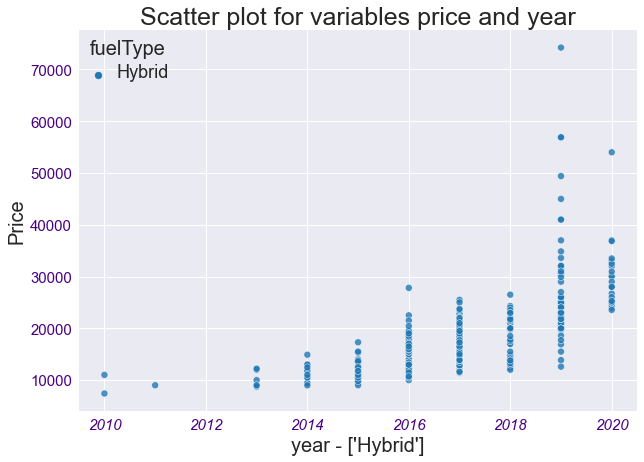

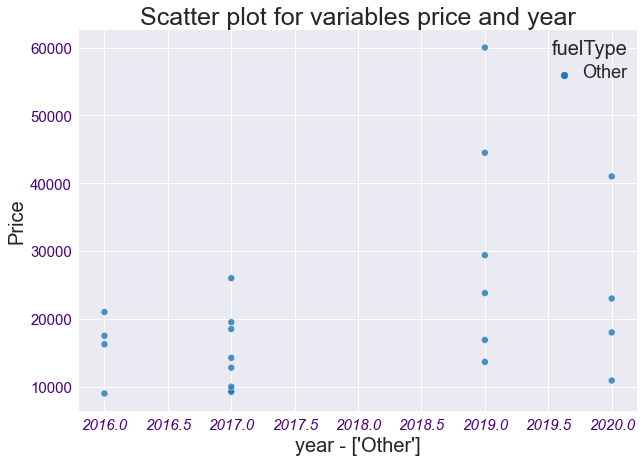

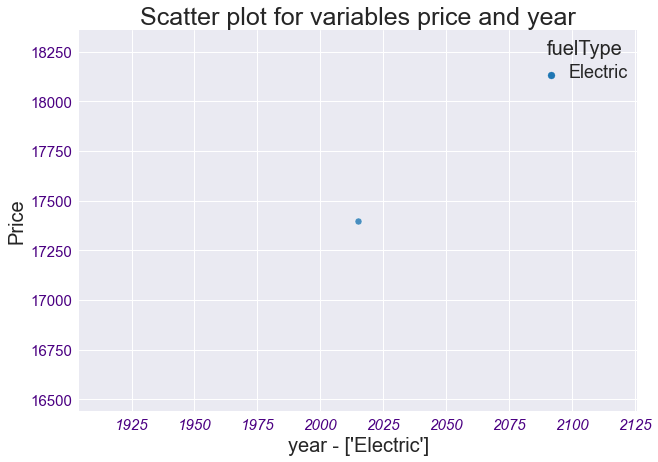

Scatter_price_mileage_fuelType.svg saved successfully


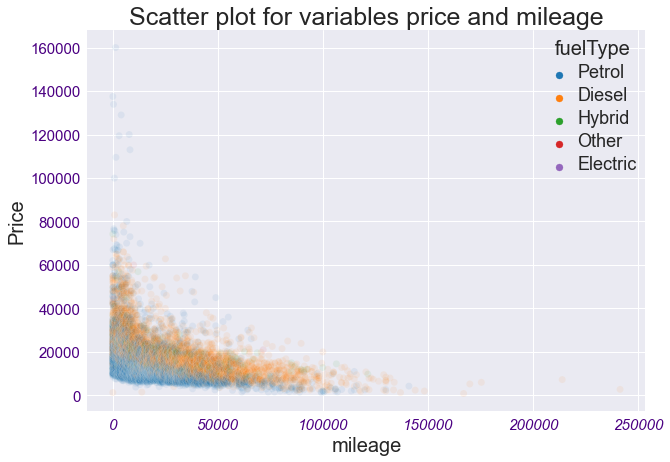

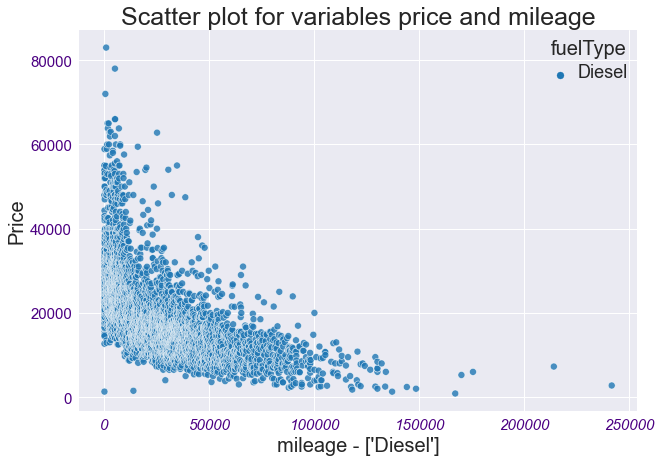

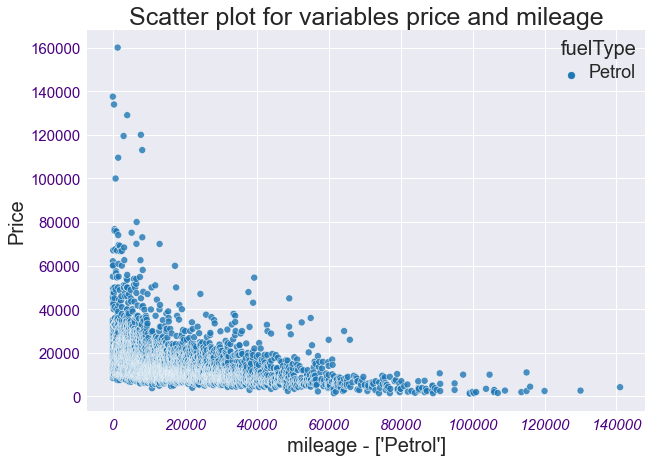

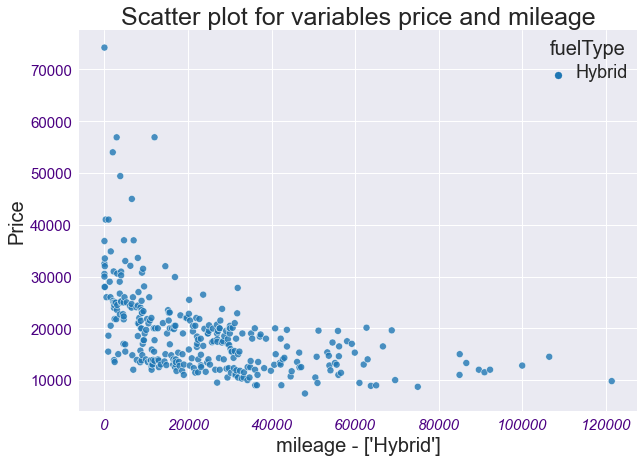

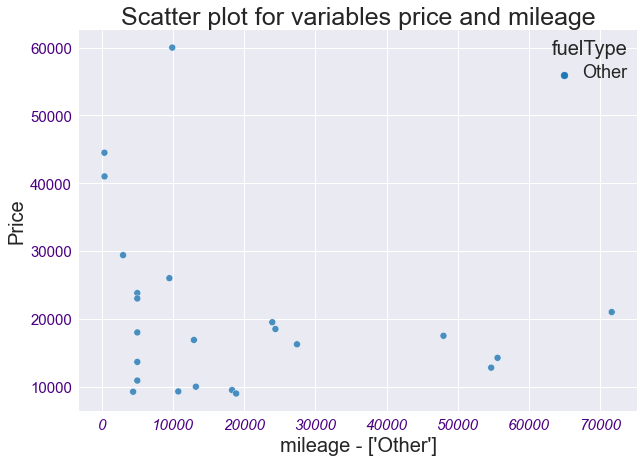

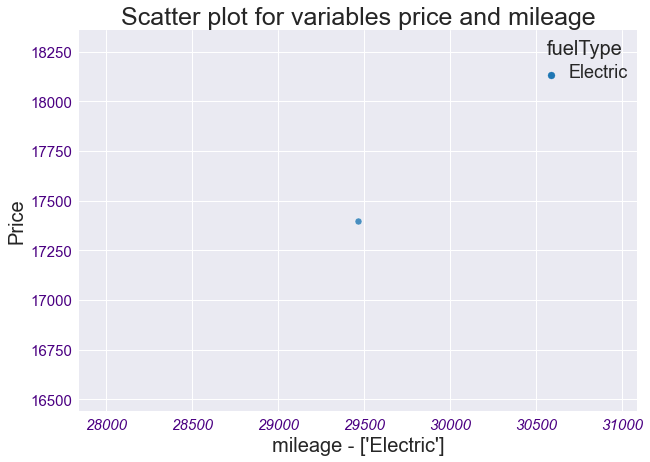

Scatter_price_engineSize_fuelType.svg saved successfully


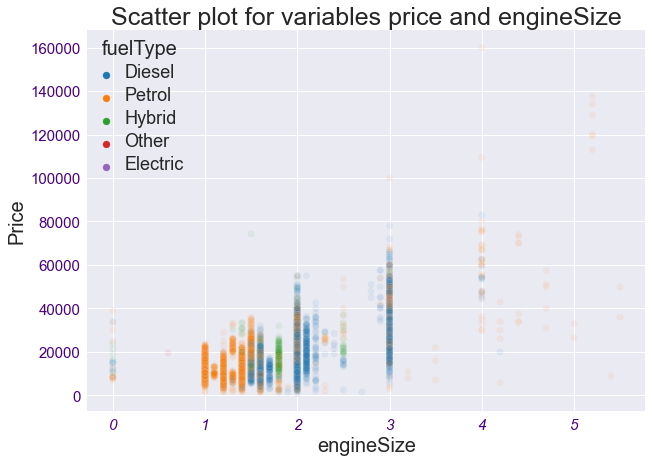

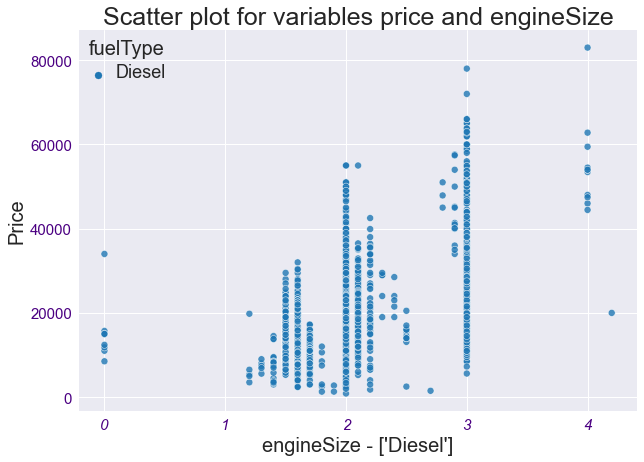

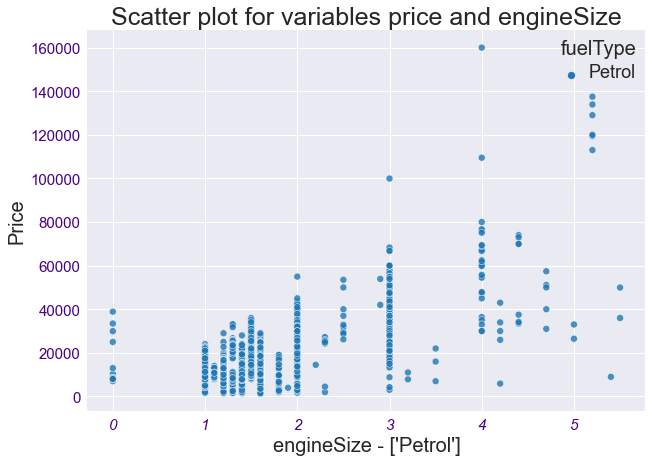

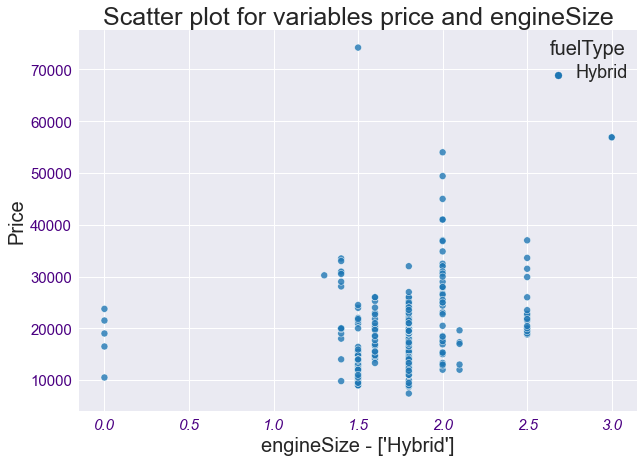

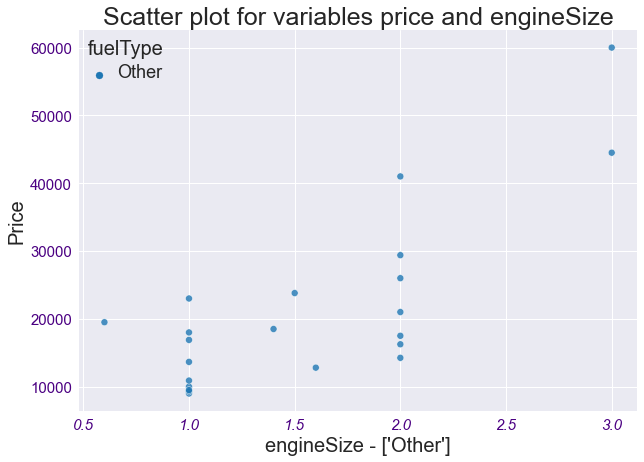

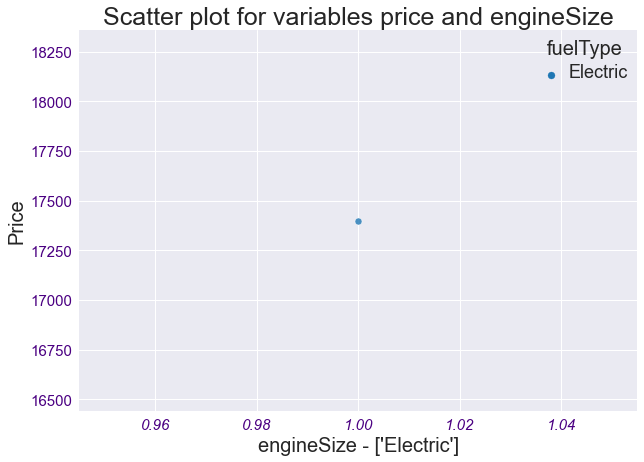

Scatter_price_Tax_fuelType.svg saved successfully


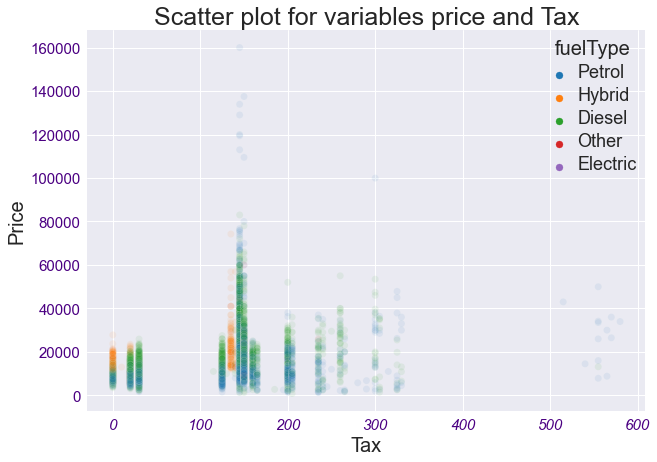

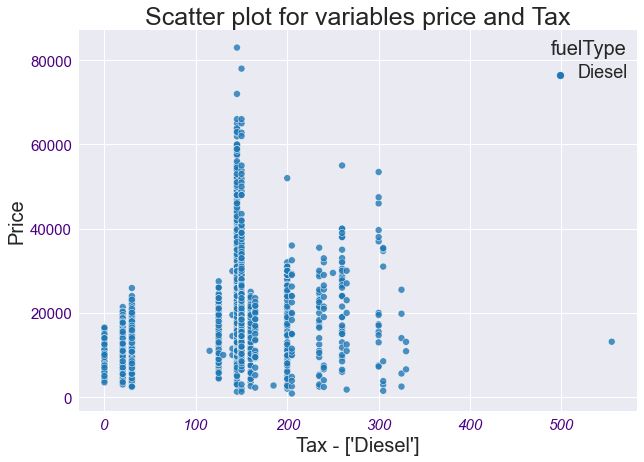

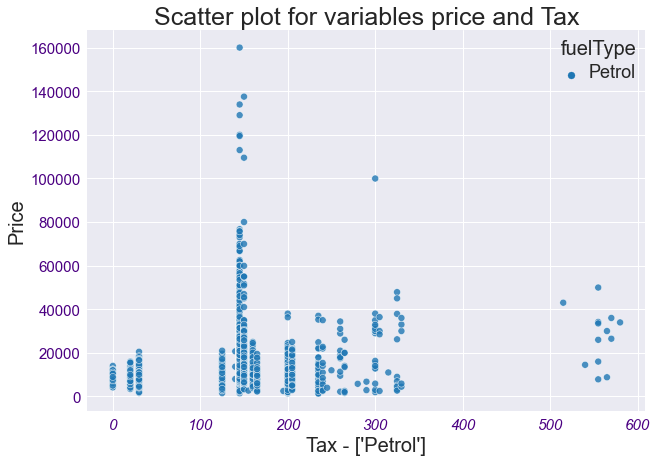

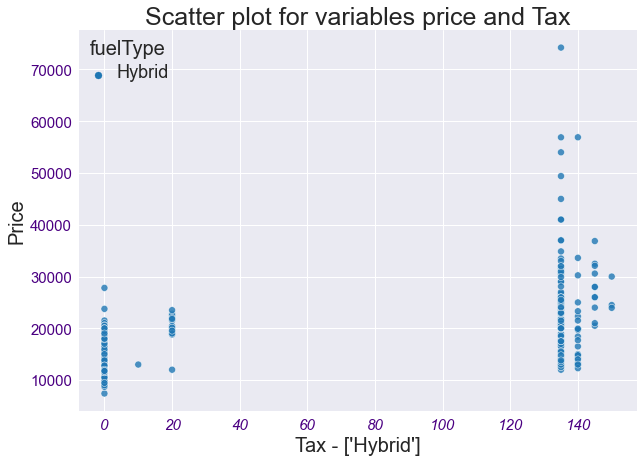

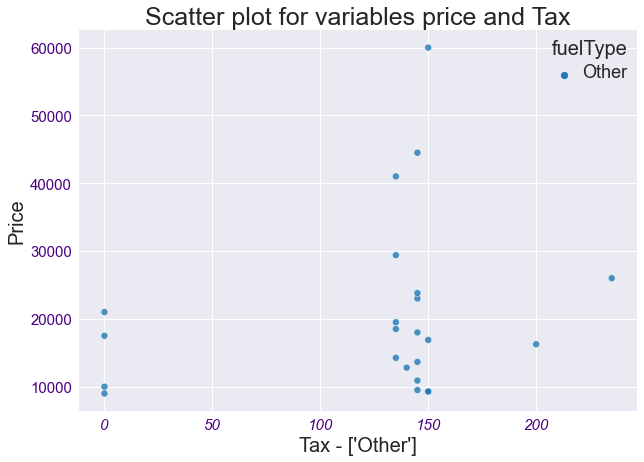

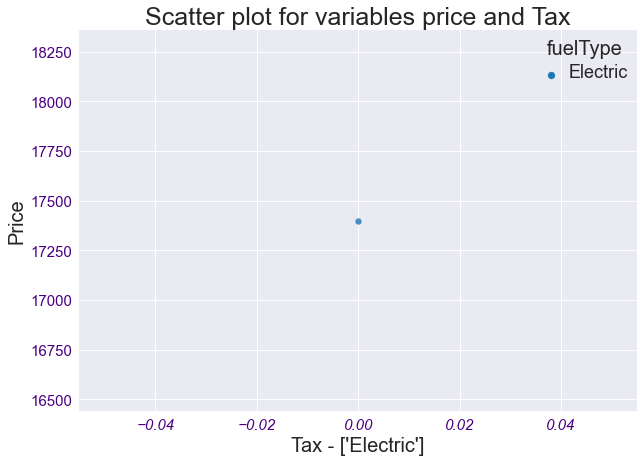

Scatter_price_l_100km_fuelType.svg saved successfully


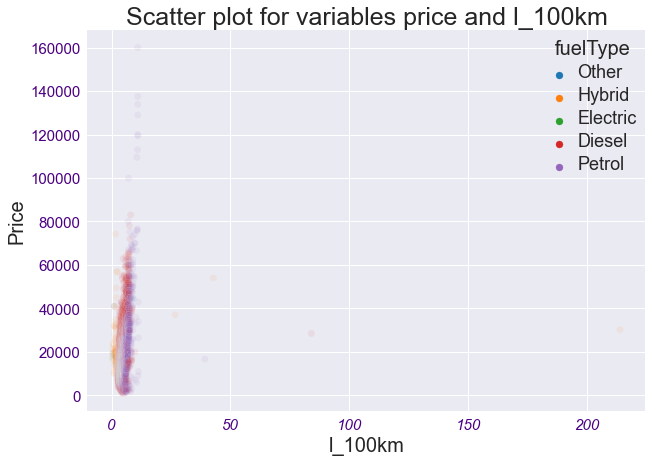

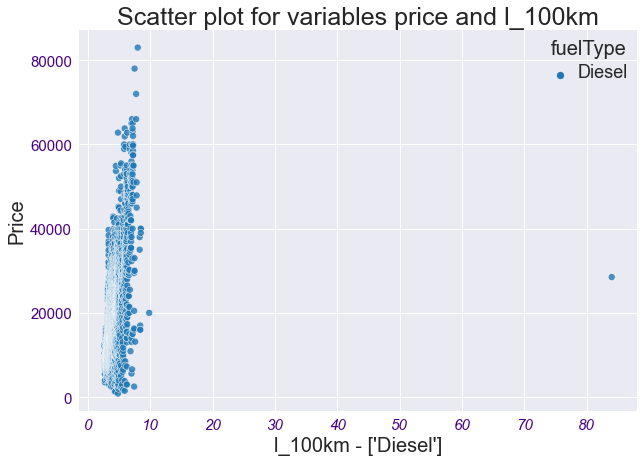

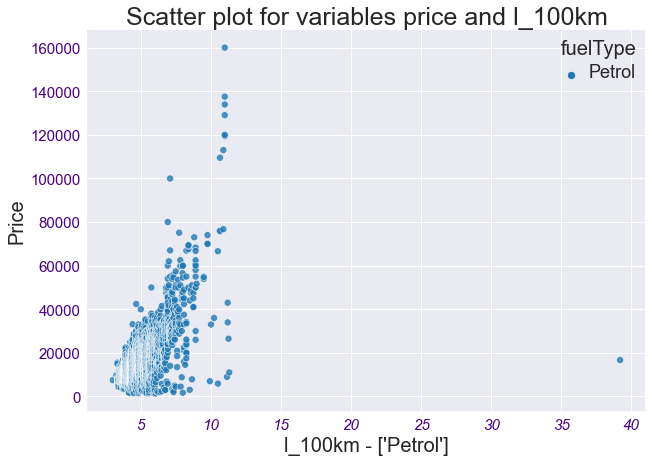

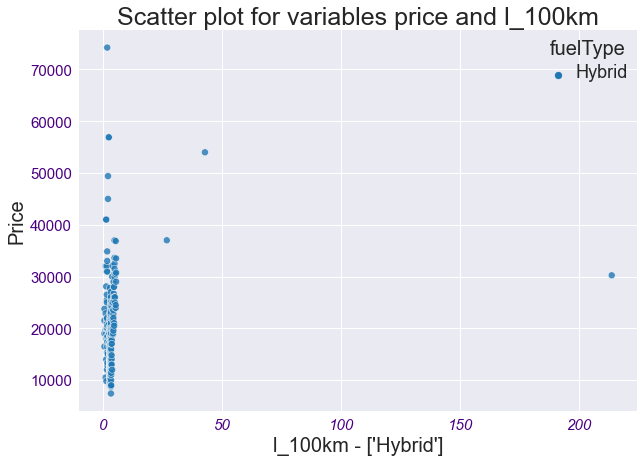

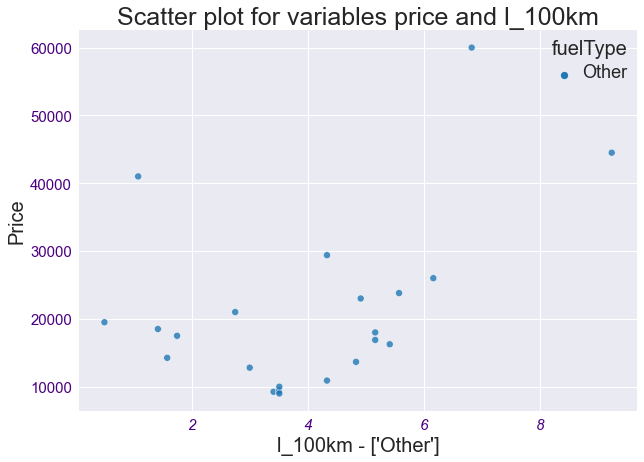

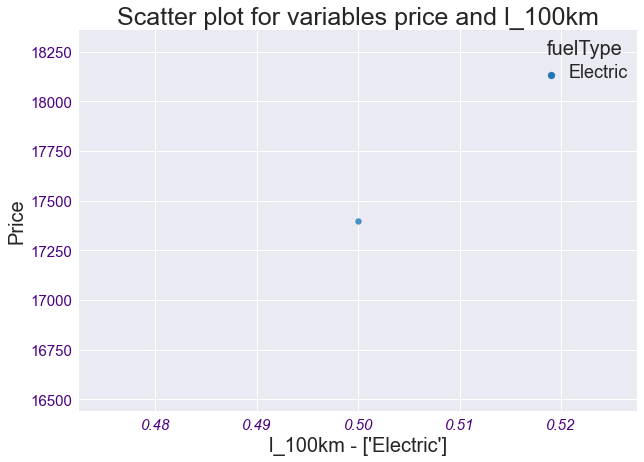

In [ ]:
q_vars = ['year', 'mileage', 'engineSize', 'Tax', 'l_100km']
for q_v in q_vars:
    full(total, q_v, 'fuelType', 0.4)

Scatter_price_l_100km_transmission.svg saved successfully


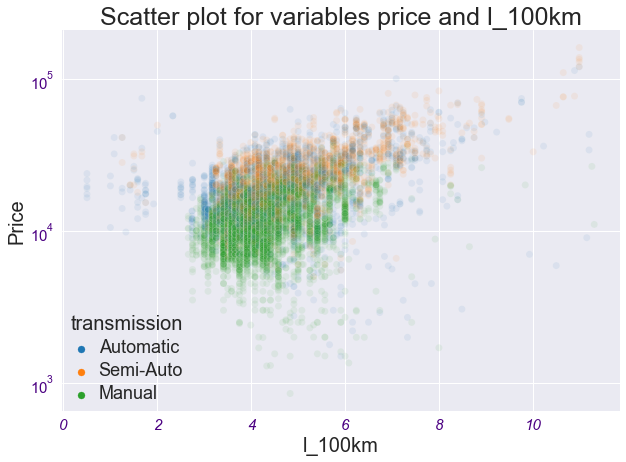

In [ ]:
scatter(total[total.l_100km <=20], 'l_100km', 'transmission', figsize=(10,7), save=True, yscale = 'log', alpha = 0.08)